In [1]:
import warnings
warnings.filterwarnings('ignore')
import sys
import scipy
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
from scipy import stats as st
pd.options.display.max_columns = None 
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
train = pd.read_csv('C:/Users/Mrinal/Desktop/house pricing/train.csv')
test = pd.read_csv('C:/Users/Mrinal/Desktop/house pricing/test.csv')
y_train = train['SalePrice']

In [3]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [4]:
train.shape, test.shape, y_train.shape

((1460, 80), (1459, 79), (1460,))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [6]:
train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1460.00000   1201.00000   1460.00000   1460.00000   1460.00000   
mean     56.89726     70.04996  10516.82808      6.09932      5.57534   
std      42.30057     24.28475   9981.26493      1.38300      1.11280   
min      20.00000     21.00000   1300.00000      1.00000      1.00000   
25%      20.00000     59.00000   7553.50000      5.00000      5.00000   
50%      50.00000     69.00000   9478.50000      6.00000      5.00000   
75%      70.00000     80.00000  11601.50000      7.00000      6.00000   
max     190.00000    313.00000 215245.00000     10.00000      9.00000   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
count 1460.00000    1460.00000  1452.00000  1460.00000  1460.00000 1460.00000   
mean  1971.26781    1984.86575   103.68526   443.63973    46.54932  567.24041   
std     30.20290      20.64541   181.06621   456.09809   161.31927  441.86696   
min   1872.00000    1950.00000     0.00000     0.00000     0.00000    0.00000   
25%   1954.00000    1967.00000     0.00000     0.00000     0.00000  223.00000   
50%   1973.00000    1994.00000     0.00000   383.50000     0.00000  477.50000   
75%   2000.00000    2004.00000   166.00000   712.25000     0.00000  808.00000   
max   2010.00000    2010.00000  1600.00000  5644.00000  1474.00000 2336.00000   

       TotalBsmtSF   1stFlrSF   2ndFlrSF  LowQualFinSF  GrLivArea  \
count   1460.00000 1460.00000 1460.00000    1460.00000 1460.00000   
mean    1057.42945 1162.62671  346.99247       5.84452 1515.46370   
std      438.70532  386.58774  436.52844      48.62308  525.48038   
min        0.00000  334.00000    0.00000       0.00000  334.00000   
25%      795.75000  882.00000    0.00000       0.00000 1129.50000   
50%      991.50000 1087.00000    0.00000       0.00000 1464.00000   
75%     1298.25000 1391.25000  728.00000       0.00000 1776.75000   
max     6110.00000 4692.00000 2065.00000     572.00000 5642.00000   

       BsmtFullBath  BsmtHalfBath   FullBath   HalfBath  BedroomAbvGr  \
count    1460.00000    1460.00000 1460.00000 1460.00000    1460.00000   
mean        0.42534       0.05753    1.56507    0.38288       2.86644   
std         0.51891       0.23875    0.55092    0.50289       0.81578   
min         0.00000       0.00000    0.00000    0.00000       0.00000   
25%         0.00000       0.00000    1.00000    0.00000       2.00000   
50%         0.00000       0.00000    2.00000    0.00000       3.00000   
75%         1.00000       0.00000    2.00000    1.00000       3.00000   
max         3.00000       2.00000    3.00000    2.00000       8.00000   

       KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
count    1460.00000    1460.00000  1460.00000   1379.00000  1460.00000   
mean        1.04658       6.51781     0.61301   1978.50616     1.76712   
std         0.22034       1.62539     0.64467     24.68972     0.74732   
min         0.00000       2.00000     0.00000   1900.00000     0.00000   
25%         1.00000       5.00000     0.00000   1961.00000     1.00000   
50%         1.00000       6.00000     1.00000   1980.00000     2.00000   
75%         1.00000       7.00000     1.00000   2002.00000     2.00000   
max         3.00000      14.00000     3.00000   2010.00000     4.00000   

       GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
count  1460.00000  1460.00000   1460.00000     1460.00000 1460.00000   
mean    472.98014    94.24452     46.66027       21.95411    3.40959   
std     213.80484   125.33879     66.25603       61.11915   29.31733   
min       0.00000     0.00000      0.00000        0.00000    0.00000   
25%     334.50000     0.00000      0.00000        0.00000    0.00000   
50%     480.00000     0.00000     25.00000        0.00000    0.00000   
75%     576.00000   168.00000     68.00000        0.00000    0.00000   
max    1418.00000   857.00000    547.00000      552.00000  508.00000   

       ScreenPorch   Po

In [7]:
train.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1159          60       RL     76.00000     9120   Pave   NaN      Reg   
729           30       RM     52.00000     6240   Pave  Grvl      Reg   
1377          50       RL     60.00000    10998   Pave  Grvl      Reg   
1439          60       RL     80.00000    11584   Pave   NaN      Reg   
1133          60       RL     80.00000     9828   Pave   NaN      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1159         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
729          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
1377         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1439         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1133         Lvl    AllPub    Inside       Gtl      SawyerW       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1159       Norm     1Fam     2Story            6            6       1974   
729        Norm     1Fam     1.5Fin            4            5       1925   
1377       Norm     1Fam     1.5Fin            5            5       1941   
1439       Norm     1Fam       SLvl            7            6       1979   
1133       Norm     1Fam     2Story            8            5       1995   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1159          1974       Hip  CompShg     HdBoard     HdBoard    BrkFace   
729           1950     Gable  CompShg     MetalSd     MetalSd       None   
1377          1960     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1439          1979       Hip  CompShg     HdBoard     HdBoard    BrkFace   
1133          1995     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1159   270.00000        Gd        TA     CBlock       TA       TA   
729      0.00000        TA        TA     CBlock       TA       TA   
1377     0.00000        TA        TA     CBlock       TA       TA   
1439    96.00000        TA        TA     CBlock       TA       TA   
1133     0.00000        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1159           No          ALQ         442          Unf           0   
729            No          BLQ         152          Unf           0   
1377           No          LwQ         408          BLQ         420   
1439           No          GLQ         315          Rec         110   
1133           No          GLQ         584          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1159        459          901    GasA        TA          Y      SBrkr   
729         628          780    GasA        TA          Y      FuseA   
1377        156          984    GasA        Ex          Y      SBrkr   
1439        114          539    GasA        TA          Y      SBrkr   
1133        544         1128    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1159       943       933             0       1876             0             0   
729        848         0           360       1208             0             0   
1377       984       620             0       1604             0             0   
1439      1040       685             0       1725             0             0   
1133      1142       878             0       2020             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1159         2         1             4             1          Gd   
729          1         0             2             1          TA   
1377         2         0             3             1          TA   
1439         2         1             3             1          TA   
1133         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Firepl

In [8]:
test.sample(5)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1121          30  C (all)     60.00000     6060   Pave   NaN      Reg   
101           20       RL     65.00000     7800   Pave   NaN      Reg   
771           20       RL     75.00000    12890   Pave   NaN      IR1   
225          120       RL     43.00000     3182   Pave   NaN      Reg   
648           20       RM     52.00000     8516   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1121         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
101          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
771          Lvl    AllPub    Inside       Gtl       Timber       Norm   
225          Lvl    AllPub    Inside       Gtl      Blmngtn       Norm   
648          Lvl    AllPub    Inside       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1121       Norm     1Fam     1Story            5            9       1930   
101        Norm     1Fam     1Story            5            7       1966   
771        Norm     1Fam     1Story            6            5       1989   
225        Norm   TwnhsE     1Story            7            5       2005   
648        Norm     1Fam     1Story            4            6       1958   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1121          2007       Hip  CompShg     MetalSd     MetalSd       None   
101           2008       Hip  CompShg     HdBoard     HdBoard    BrkFace   
771           1989     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
225           2006     Gable  CompShg     VinylSd     VinylSd    BrkFace   
648           2006     Gable  CompShg     MetalSd     MetalSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1121     0.00000        Gd        TA     BrkTil       TA       TA   
101     47.00000        TA        TA     CBlock       TA       TA   
771    128.00000        TA        TA     CBlock       Gd       TA   
225     16.00000        Gd        TA      PConc       Gd       TA   
648      0.00000        TA        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1121           No          ALQ   737.00000          Unf     0.00000   
101            Mn          BLQ   240.00000          Rec   474.00000   
771            No          Unf     0.00000          Unf     0.00000   
225            Av          GLQ    16.00000          Unf     0.00000   
648            No          Unf     0.00000          Unf     0.00000   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1121  100.00000    837.00000    GasA        Ex          Y      SBrkr   
101   150.00000    864.00000    GasA        Ex          Y      SBrkr   
771  1495.00000   1495.00000    GasA        Ex          Y      SBrkr   
225  1204.00000   1220.00000    GasA        Ex          Y      SBrkr   
648   869.00000    869.00000    GasA        TA          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1121      1001         0             0       1001       0.00000       0.00000   
101        892         0             0        892       1.00000       0.00000   
771       1495         0             0       1495       0.00000       0.00000   
225       1220         0             0       1220       0.00000       0.00000   
648       1093         0             0       1093       0.00000       0.00000   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1121         1         0             2             1          Gd   
101          1         0             3             1          Gd   
771          2         0             3             1          TA   
225          2         0             2             1          Gd   
648          1         0             2             1          TA   

      TotRmsAbvGrd Functional  Firepl

In [9]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
train['SalePrice'].describe()

count     1460.00000
mean    180921.19589
std      79442.50288
min      34900.00000
25%     129975.00000
50%     163000.00000
75%     214000.00000
max     755000.00000
Name: SalePrice, dtype: float64

In [11]:
train.groupby('SaleType').count()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
SaleType                                                                        
COD               43        43           32       43      43      3        43   
CWD                4         4            4        4       4      1         4   
Con                2         2            2        2       2      0         2   
ConLD              9         9            8        9       9      0         9   
ConLI              5         5            4        5       5      1         5   
ConLw              5         5            5        5       5      0         5   
New              122       122          121      122     122      7       122   
Oth                3         3            3        3       3      0         3   
WD              1267      1267         1022     1267    1267     79      1267   

          LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
SaleType                                                               
COD                43         43         43         43            43   
CWD                 4          4          4          4             4   
Con                 2          2          2          2             2   
ConLD               9          9          9          9             9   
ConLI               5          5          5          5             5   
ConLw               5          5          5          5             5   
New               122        122        122        122           122   
Oth                 3          3          3          3             3   
WD               1267       1267       1267       1267          1267   

          Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
SaleType                                                              
COD               43          43        43          43           43   
CWD                4           4         4           4            4   
Con                2           2         2           2            2   
ConLD              9           9         9           9            9   
ConLI              5           5         5           5            5   
ConLw              5           5         5           5            5   
New              122         122       122         122          122   
Oth                3           3         3           3            3   
WD              1267        1267      1267        1267         1267   

          OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
SaleType                                                              
COD                43         43            43         43        43   
CWD                 4          4             4          4         4   
Con                 2          2             2          2         2   
ConLD               9          9             9          9         9   
ConLI               5          5             5          5         5   
ConLw               5          5             5          5         5   
New               122        122           122        122       122   
Oth                 3          3             3          3         3   
WD               1267       1267          1267       1267      1267   

          Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
SaleType                                                                
COD                43           43          43          43         43   
CWD                 4            4           4           4          4   
Con                 2            2           2           2          2   
ConLD               9            9           9           9          9   
ConLI               5            5           5           5          5   
ConLw               5            5           5           5          5   
New               122          122         119         119        122   
Oth                 3            3           3           3          3   
WD               1267         1

In [12]:
numeric_features=train.select_dtypes(include=[np.number])
categorical_features=train.select_dtypes(include=[np.object])

In [13]:
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


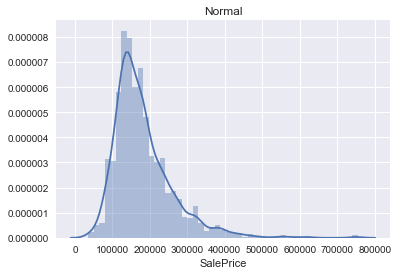

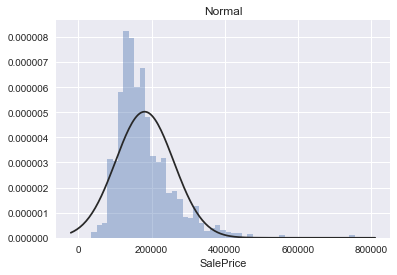

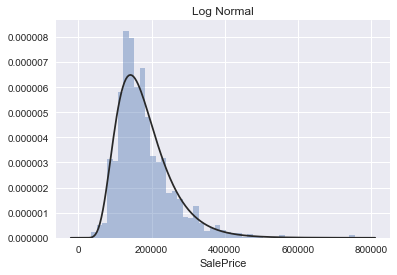

In [15]:
plt.figure(1); plt.title('Normal')
sns.distplot(train['SalePrice'])
plt.figure(2); plt.title('Normal')
sns.distplot(train['SalePrice'], kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(train['SalePrice'], kde=False, fit=st.lognorm)

In [16]:
#skewness and kurtosis
train['SalePrice'].skew(), train['SalePrice'].kurt()

(1.8828757597682129, 6.536281860064529)

In [17]:
train['SalePrice1'] = np.log(train['SalePrice'])
train['SalePrice1'].skew(), train['SalePrice1'].kurt()

(0.12133506220520406, 0.8095319958036296)

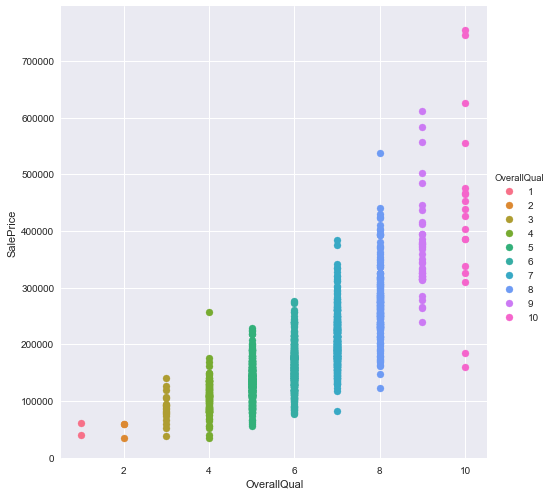

In [18]:
sns.FacetGrid(train, hue="OverallQual", size=7) \
   .map(plt.scatter, "OverallQual", "SalePrice") \
   .add_legend()
plt.show()

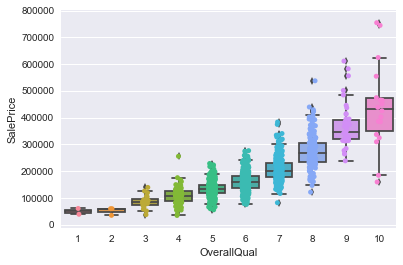

In [19]:
ax= sns.boxplot(x="OverallQual", y="SalePrice", data=train)
ax= sns.stripplot(x="OverallQual", y="SalePrice", data=train, jitter=True, edgecolor="black")
plt.show()

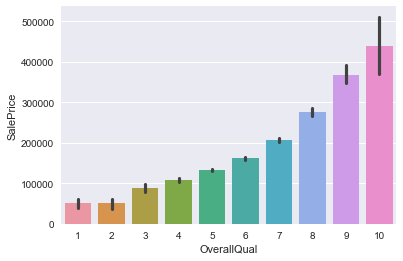

In [20]:
sns.barplot(train.OverallQual,train.SalePrice)

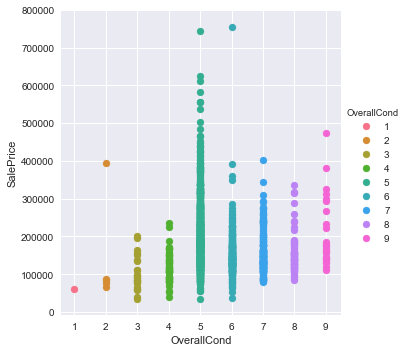

In [21]:
sns.FacetGrid(train, hue="OverallCond", size=5) \
   .map(plt.scatter, "OverallCond", "SalePrice") \
   .add_legend()
plt.show()

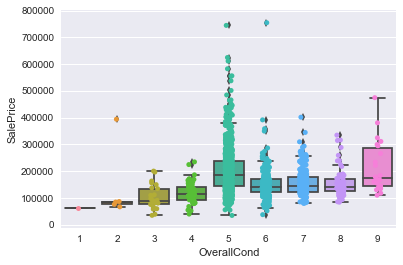

In [22]:
ax= sns.boxplot(x="OverallCond", y="SalePrice", data=train)
ax= sns.stripplot(x="OverallCond", y="SalePrice", data=train, jitter=True, edgecolor="black")
plt.show()

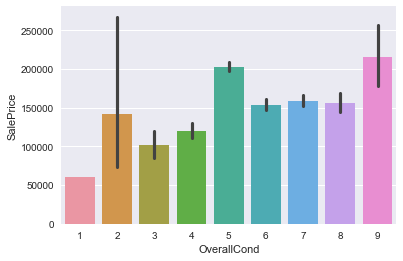

In [23]:
sns.barplot(train.OverallCond,train.SalePrice)

<Figure size 432x288 with 0 Axes>

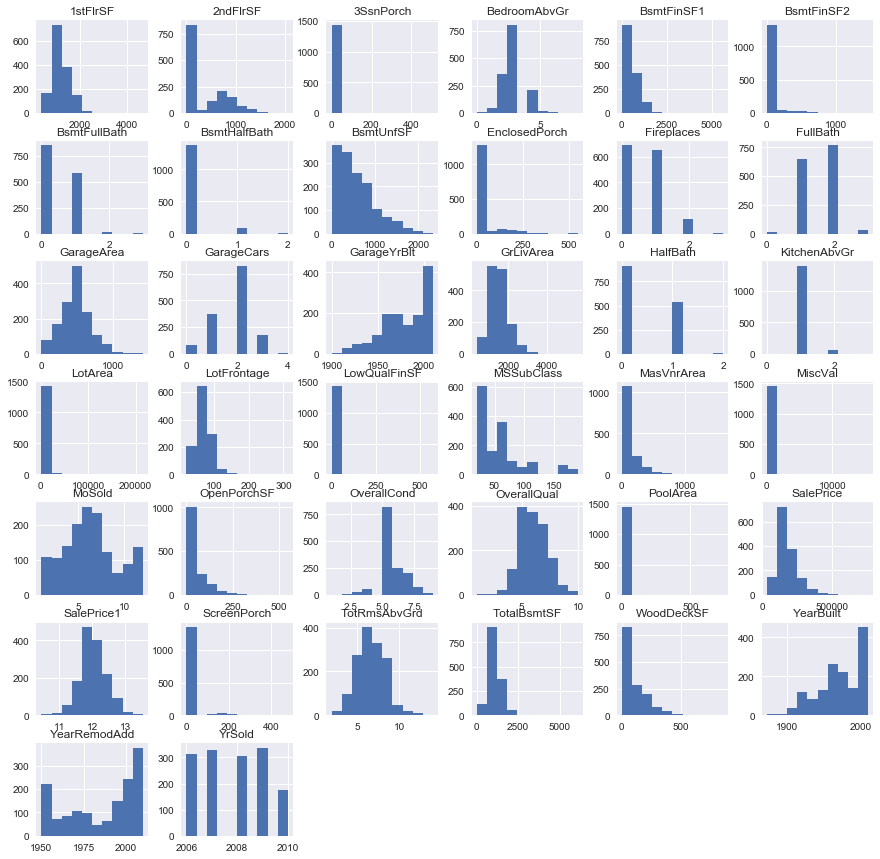

<Figure size 432x288 with 0 Axes>

In [24]:
train.hist(figsize=(15,15))
plt.figure()

In [25]:
correlation = numeric_features.corr()
print(correlation['SalePrice'].sort_values(ascending = False))

SalePrice        1.00000
OverallQual      0.79098
GrLivArea        0.70862
GarageCars       0.64041
GarageArea       0.62343
TotalBsmtSF      0.61358
1stFlrSF         0.60585
FullBath         0.56066
TotRmsAbvGrd     0.53372
YearBuilt        0.52290
YearRemodAdd     0.50710
GarageYrBlt      0.48636
MasVnrArea       0.47749
Fireplaces       0.46693
BsmtFinSF1       0.38642
LotFrontage      0.35180
WoodDeckSF       0.32441
2ndFlrSF         0.31933
OpenPorchSF      0.31586
HalfBath         0.28411
LotArea          0.26384
BsmtFullBath     0.22712
BsmtUnfSF        0.21448
BedroomAbvGr     0.16821
ScreenPorch      0.11145
PoolArea         0.09240
MoSold           0.04643
3SsnPorch        0.04458
BsmtFinSF2      -0.01138
BsmtHalfBath    -0.01684
MiscVal         -0.02119
LowQualFinSF    -0.02561
YrSold          -0.02892
OverallCond     -0.07786
MSSubClass      -0.08428
EnclosedPorch   -0.12858
KitchenAbvGr    -0.13591
Name: SalePrice, dtype: float64


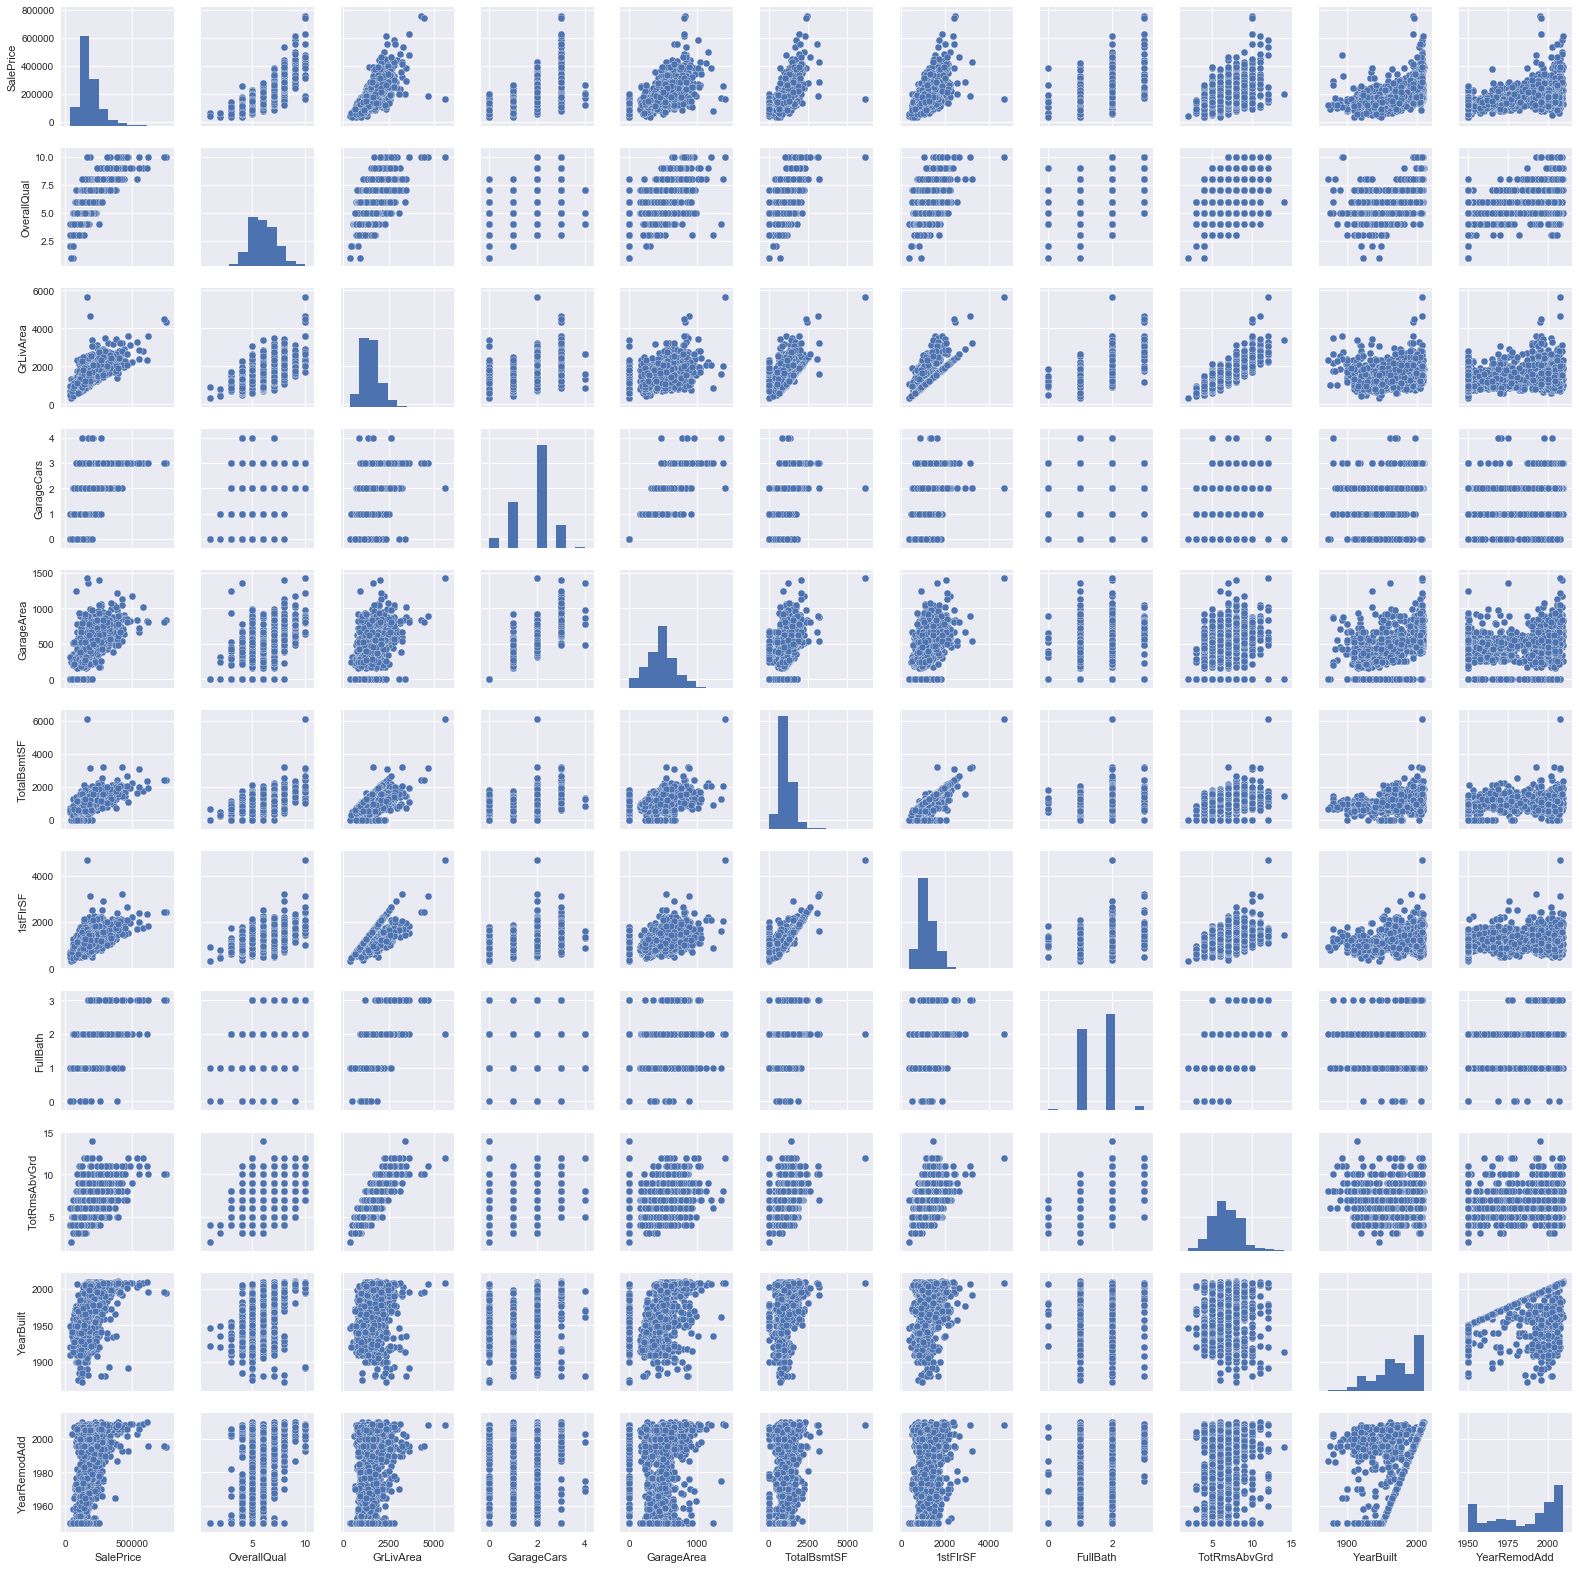

In [26]:
sns.set()
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
sns.pairplot(train[columns],size = 2 ,kind ='scatter')
plt.show()

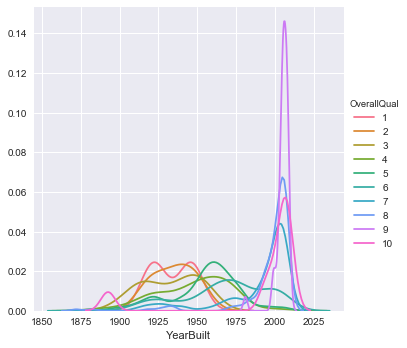

In [27]:
sns.FacetGrid(train[columns], hue="OverallQual", size=5).map(sns.kdeplot, "YearBuilt").add_legend()
plt.show()

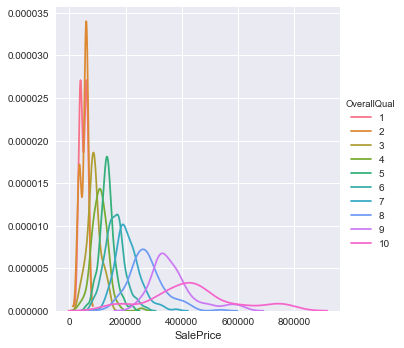

In [28]:
sns.FacetGrid(train[columns], hue="OverallQual", size=5).map(sns.kdeplot, "SalePrice").add_legend()
plt.show()

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


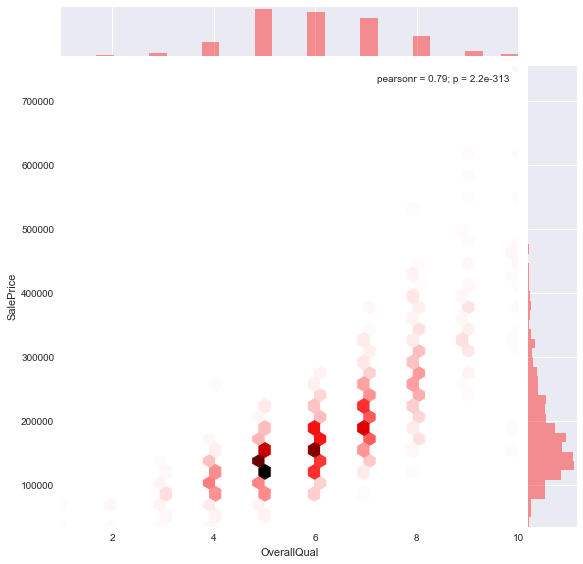

In [29]:
sns.jointplot(x="OverallQual", y="SalePrice", data=train, size=8,ratio=8, kind='hex',color='red')
plt.show()

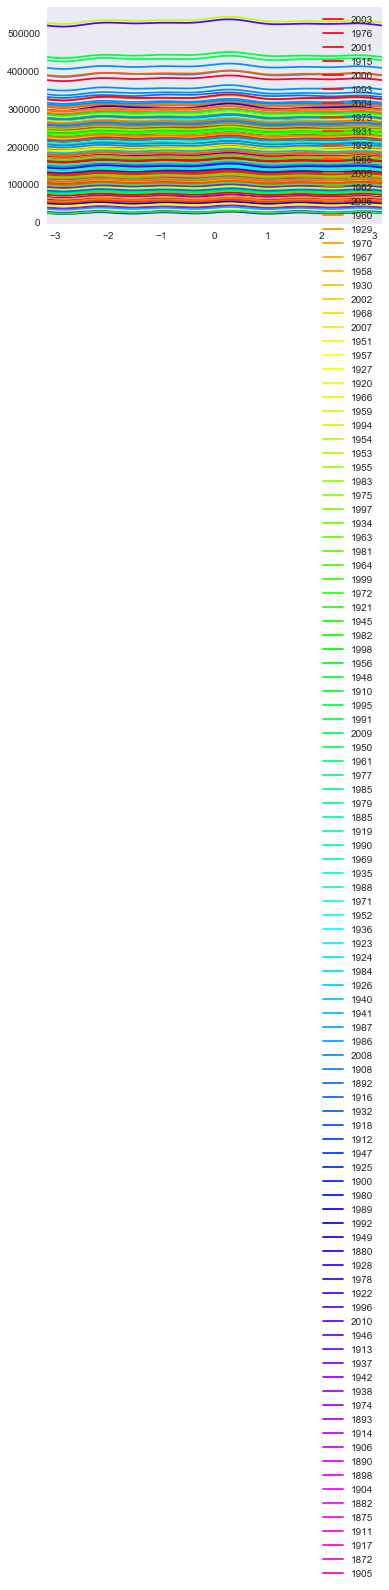

In [30]:
from pandas.tools.plotting import andrews_curves
andrews_curves(train[columns], "YearBuilt",colormap='gist_rainbow')
plt.show()

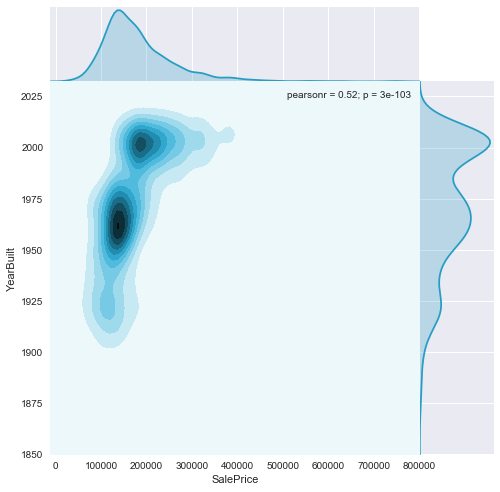

In [31]:
sns.jointplot(x="SalePrice", y="YearBuilt", data=train, size=7, kind='kde', color='#269DC4', space=0)

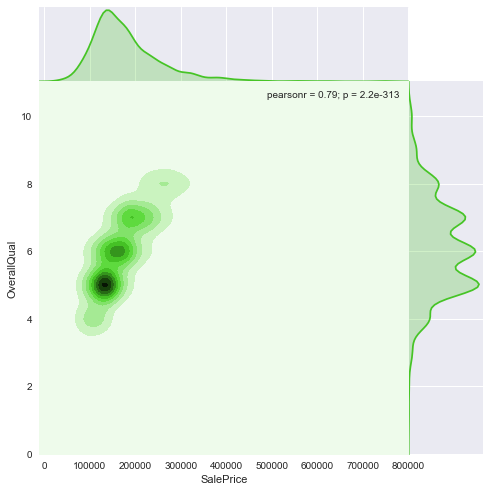

In [32]:
sns.jointplot(x="SalePrice", y="OverallQual", data=train, size=7, kind='kde', color='#46C426', space=0)

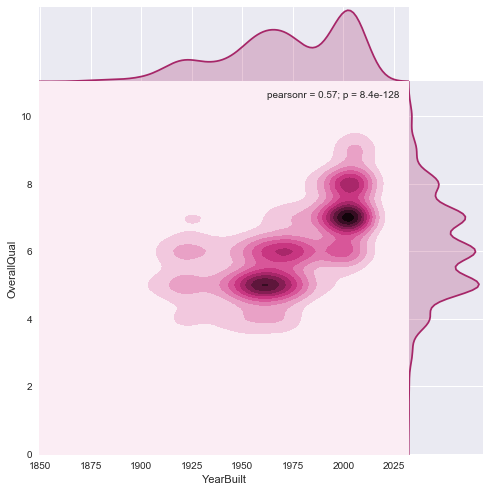

In [33]:
sns.jointplot(x="YearBuilt", y="OverallQual", data=train, size=7, kind='kde', color='#A62668', space=0)

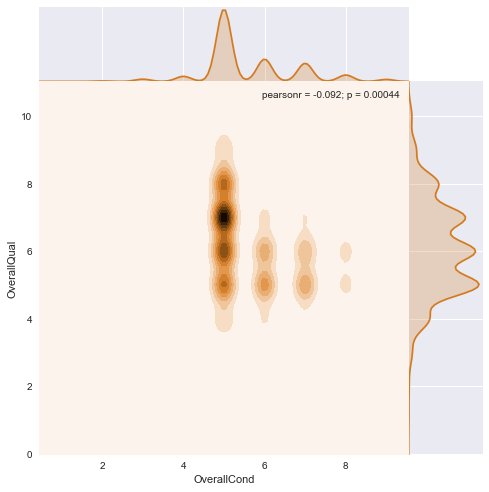

In [34]:
sns.jointplot(x="OverallCond", y="OverallQual", data=train, size=7, kind='kde', color='#D47B22', space=0)

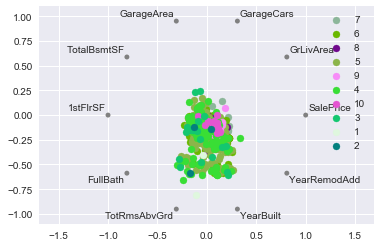

In [35]:
from pandas.tools.plotting import radviz
radviz(train[columns], "OverallQual")

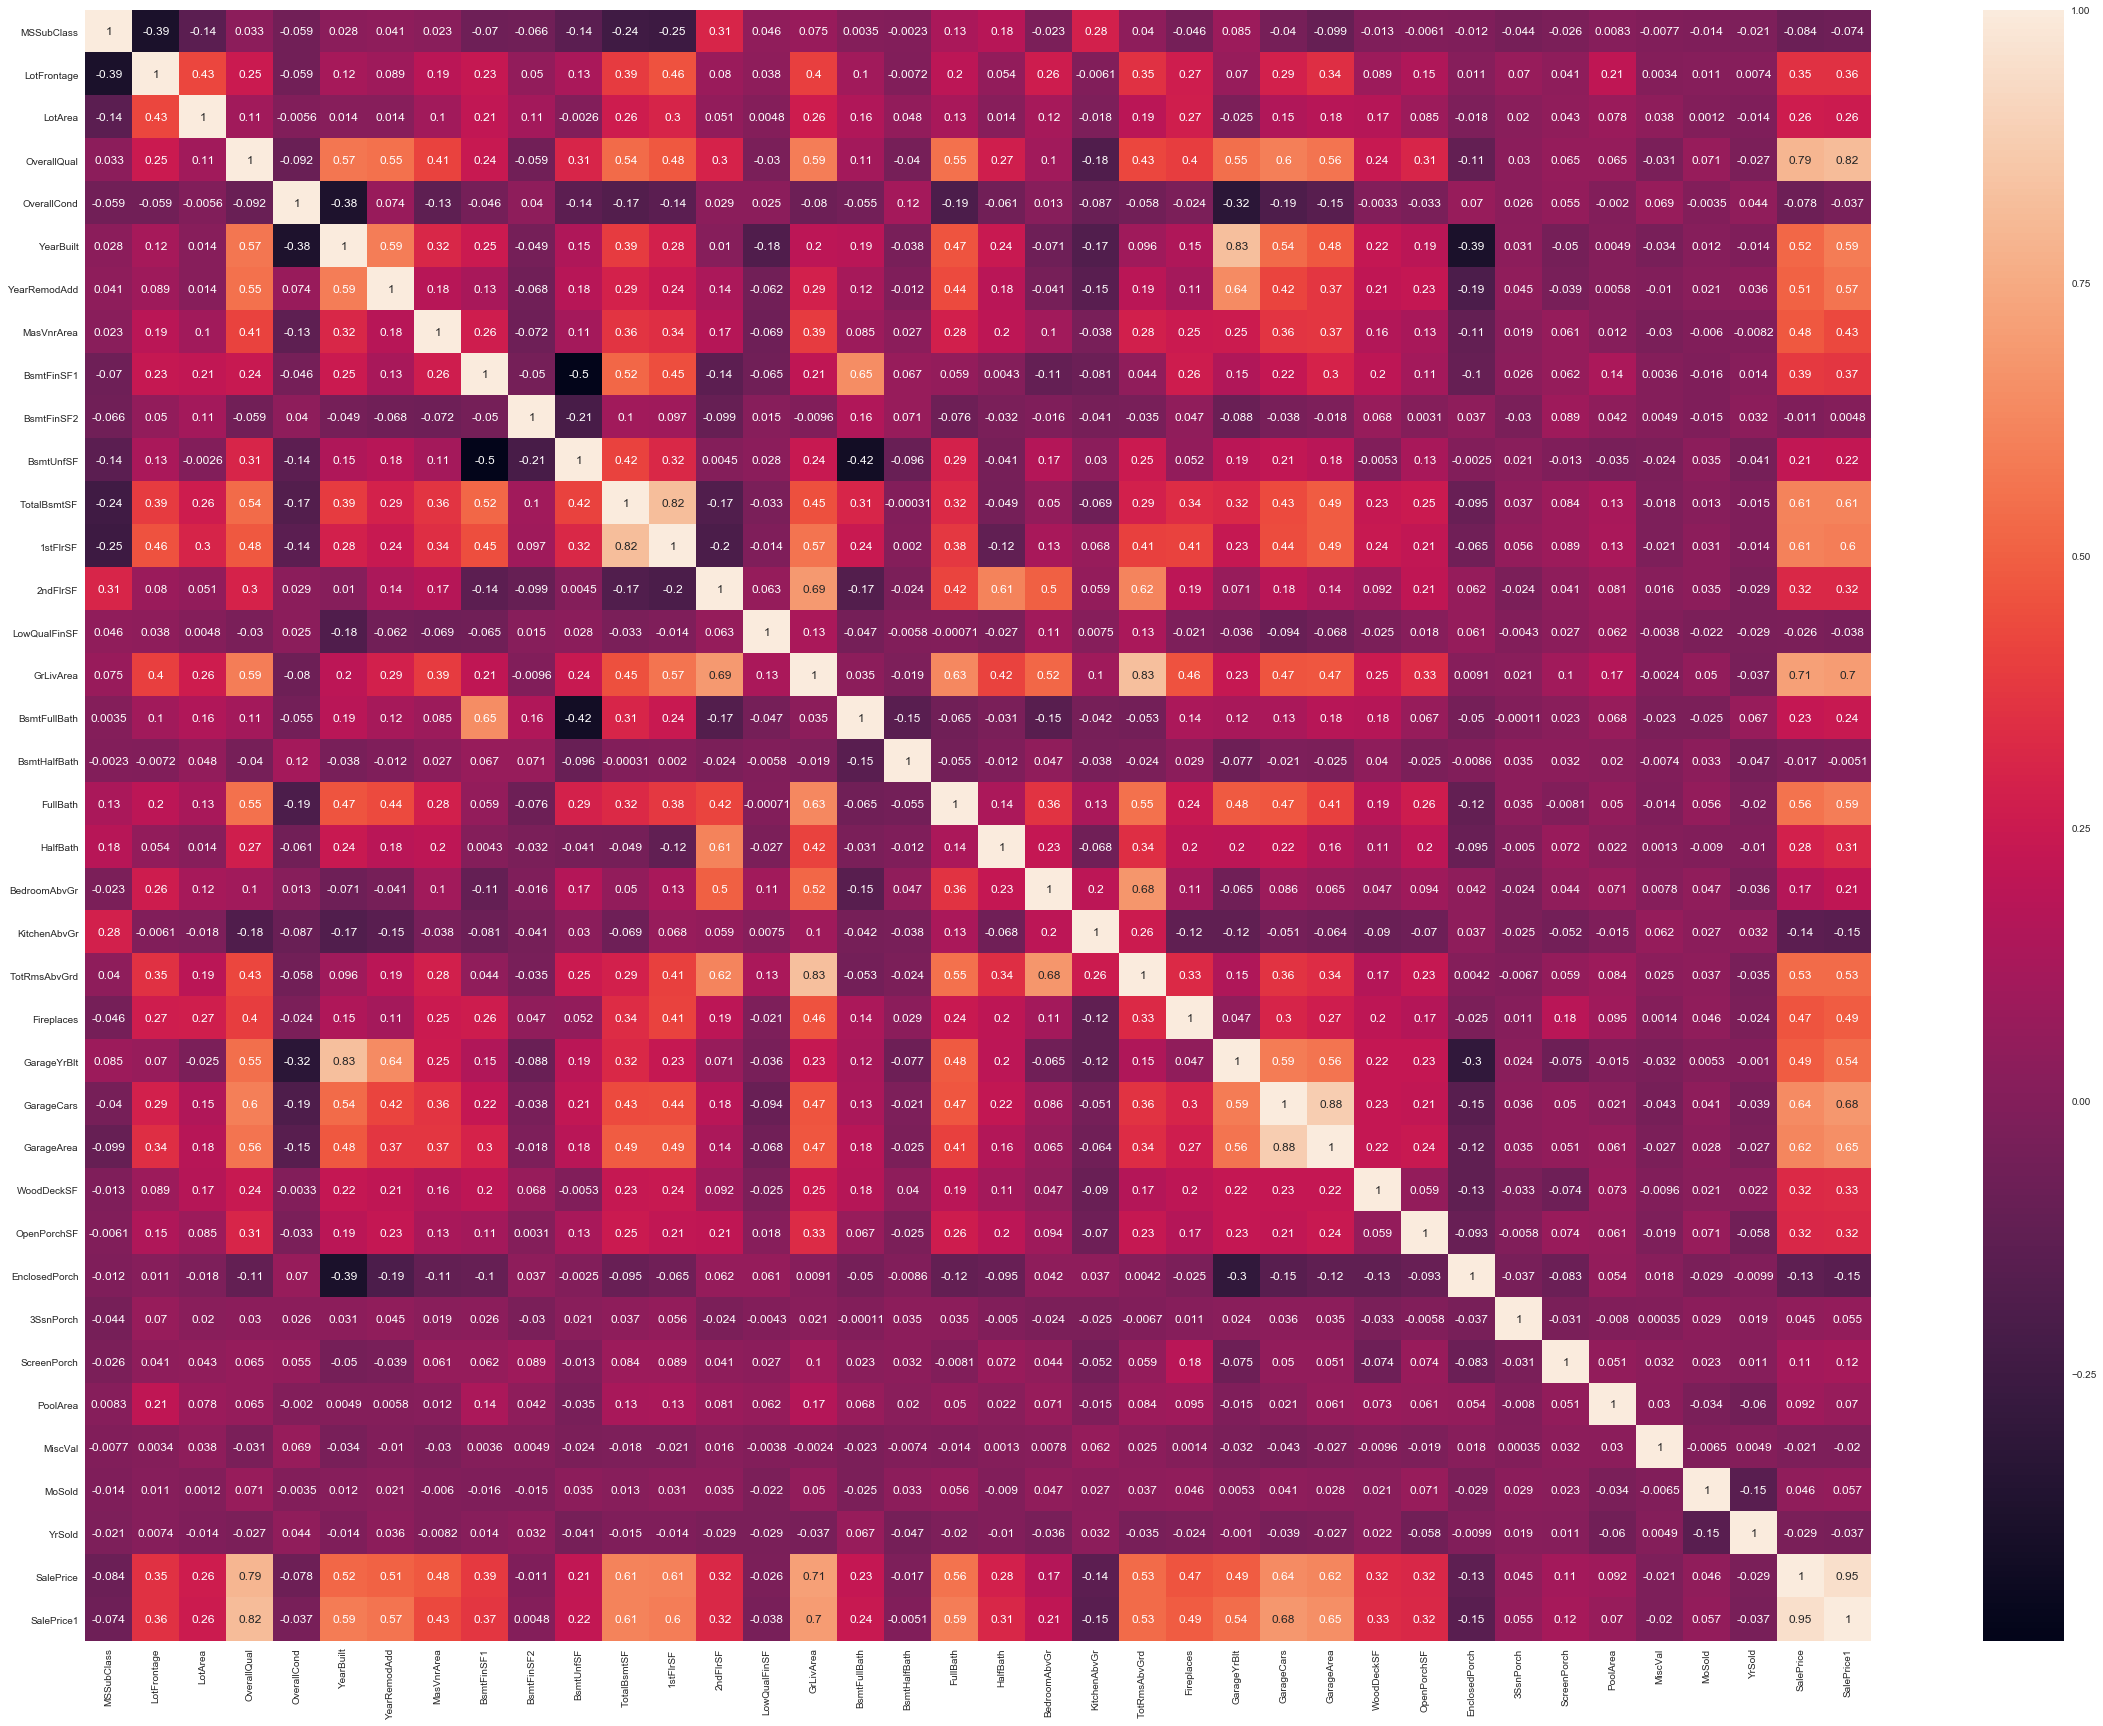

In [36]:
corrmat = train.corr()
plt.subplots(figsize=(40, 30))
sns.heatmap(corrmat, vmax=1, annot=True)
sns.set(font_scale=1.8);

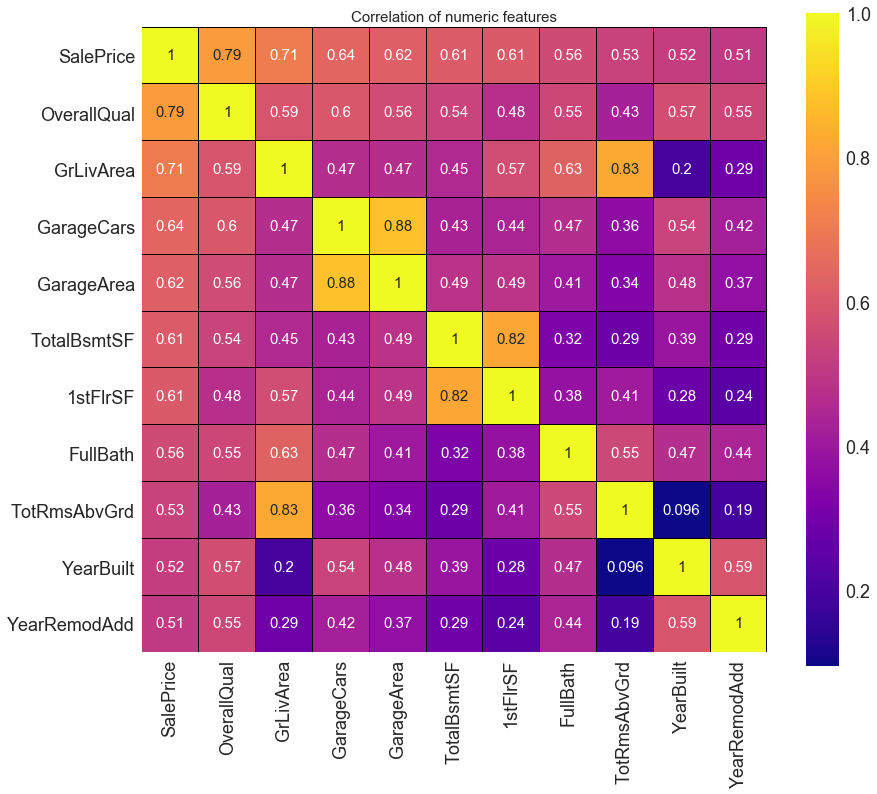

In [37]:
zoomedCorrelation = correlation.loc[columns,columns]
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numeric features',size=15)
sns.heatmap(zoomedCorrelation, square = True, linewidths=0.01, vmax=1, annot=True,cmap='plasma',
            linecolor="black", annot_kws = {'size':15})

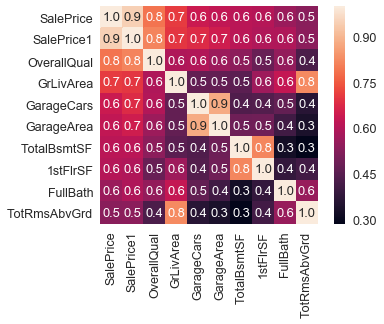

In [38]:
sns.set(font_scale=1.25)
corrmat=train.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.1f', annot_kws={'size':13},
           yticklabels=cols.values,
           xticklabels=cols.values)

In [39]:
categorical_features.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

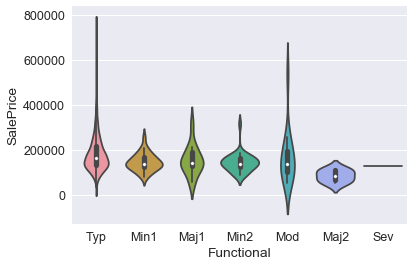

In [40]:
sns.violinplot(data=train,x="Functional", y="SalePrice")

In [41]:
categorical_features.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

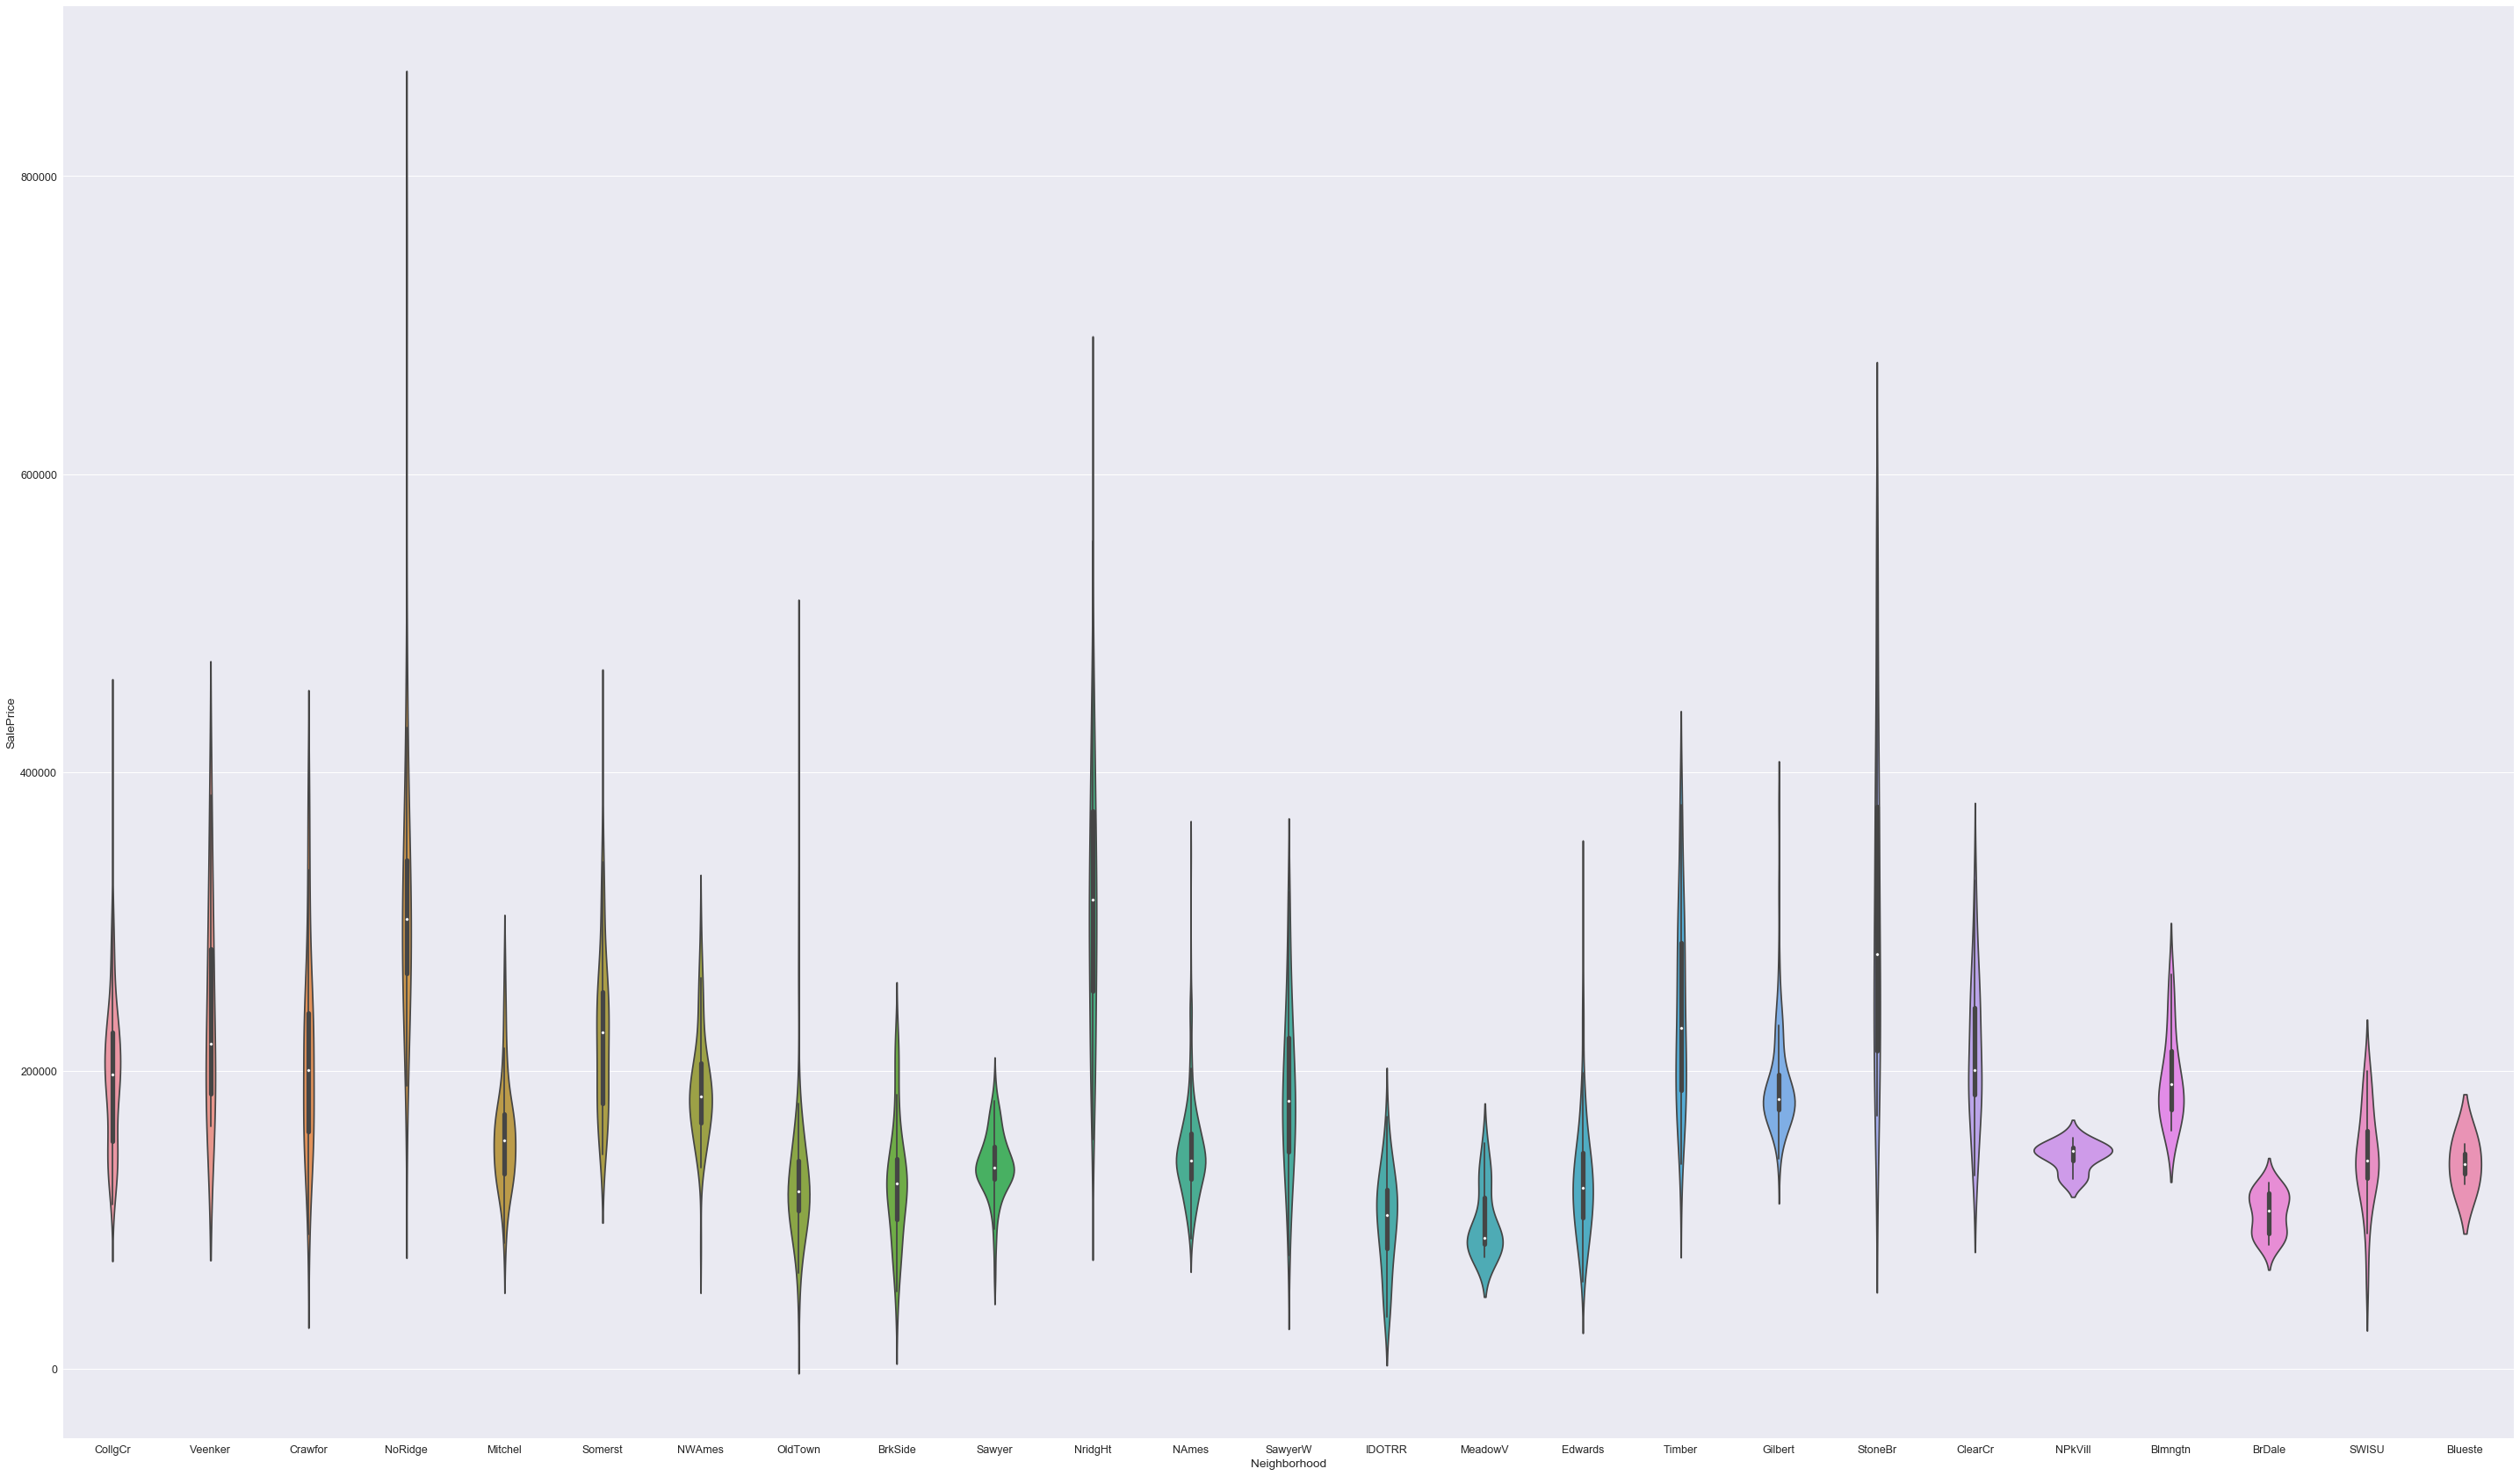

In [42]:
plt.subplots(figsize=(50, 30))
sns.violinplot(data=train,x="Neighborhood", y="SalePrice")
sns.set(font_scale=2.5);

In [43]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [44]:
all_data.shape

(2919, 81)

In [45]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

Missing Ratio
PoolQC             99.65742
MiscFeature        96.40288
Alley              93.21686
Fence              80.43851
SalePrice1         49.98287
SalePrice          49.98287
FireplaceQu        48.64680
LotFrontage        16.64954
GarageCond          5.44707
GarageFinish        5.44707
GarageQual          5.44707
GarageYrBlt         5.44707
GarageType          5.37855
BsmtExposure        2.80918
BsmtCond            2.80918
BsmtQual            2.77492
BsmtFinType2        2.74066
BsmtFinType1        2.70641
MasVnrType          0.82220
MasVnrArea          0.78794
MSZoning            0.13703
BsmtFullBath        0.06852
BsmtHalfBath        0.06852
Utilities           0.06852
Functional          0.06852
Electrical          0.03426
BsmtUnfSF           0.03426
Exterior1st         0.03426
Exterior2nd         0.03426
TotalBsmtSF         0.03426

Text(0.5,1,'Percent missing data by feature')

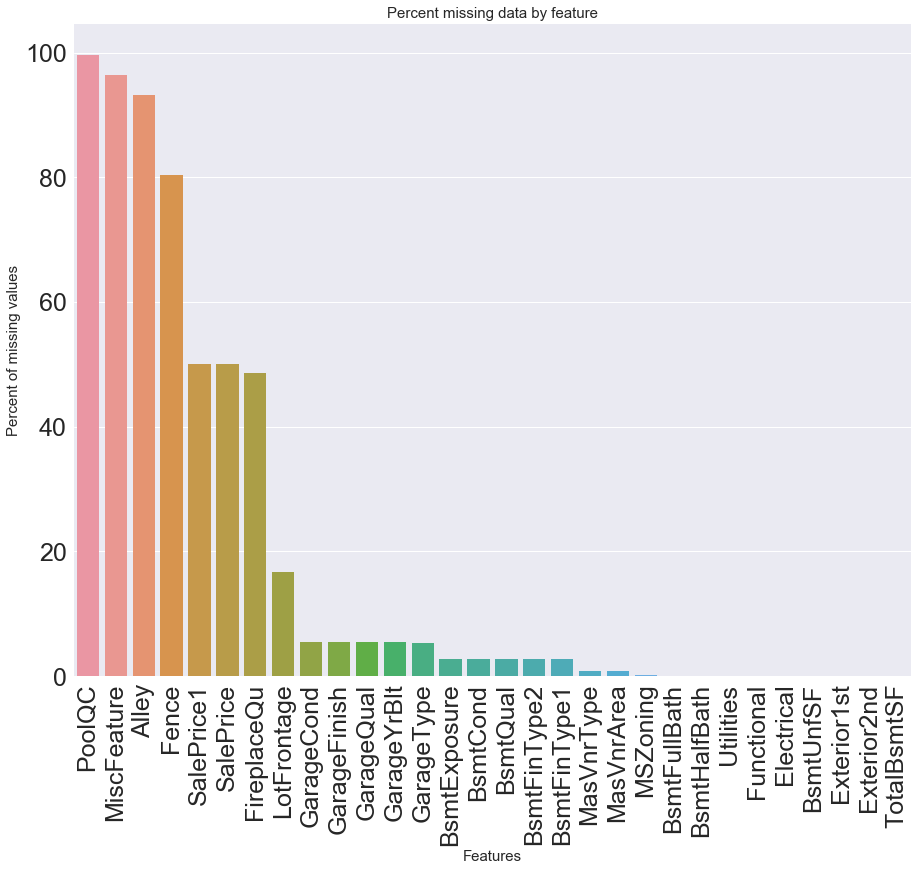

In [46]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [47]:
# columns to be dropped
columnsToDrop = missing_data[missing_data['Missing Ratio']>60].index

all_data = all_data.drop(columnsToDrop, axis=1)
print(all_data.shape)

(2919, 77)


In [48]:
for col in ('FireplaceQu','MSSubClass','MasVnrType','BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'Fence','Alley','MiscFeature','PoolQC'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna('None')

In [49]:
for col in ('GarageArea', 'GarageCars','BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath','MasVnrArea'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(0)

In [50]:
all_data.Functional.value_counts(),all_data.Utilities.value_counts()

(Typ     2717
 Min2      70
 Min1      65
 Mod       35
 Maj1      19
 Maj2       9
 Sev        2
 Name: Functional, dtype: int64, AllPub    2916
 NoSeWa       1
 Name: Utilities, dtype: int64)

In [51]:
for col in ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Functional','Utilities'):
    if col in all_data.columns:
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [52]:
all_data.Functional.value_counts(),all_data.Utilities.value_counts()

(Typ     2719
 Min2      70
 Min1      65
 Mod       35
 Maj1      19
 Maj2       9
 Sev        2
 Name: Functional, dtype: int64, AllPub    2918
 NoSeWa       1
 Name: Utilities, dtype: int64)

In [53]:
# Impute the missing values of 'GarageYrBlt' based on the median of 'YearBuilt' 
all_data['YearBuiltCut'] = pd.qcut(all_data.YearBuilt,10)
all_data['GarageYrBlt']= all_data.groupby(['YearBuiltCut'])['GarageYrBlt'].transform(lambda x : x.fillna(x.median()))
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(int)
all_data.drop('YearBuiltCut',axis=1,inplace=True)

In [54]:
# Impute the missing values of 'LotFrontage' based on the median of 'Neighborhood'
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [55]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Missing Ratio
SalePrice1       49.98287
SalePrice        49.98287

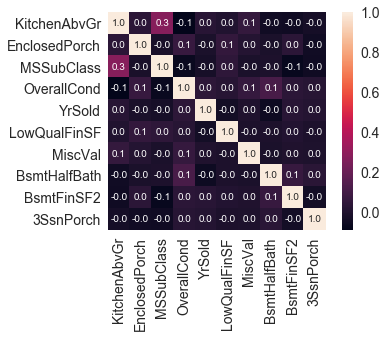

In [56]:
sns.set(font_scale=1.4)
corrmat=train.corr()
cols = corrmat.nsmallest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.heatmap(cm, annot=True, square=True,
           fmt='.1f', annot_kws={'size':10},
           yticklabels=cols.values,
           xticklabels=cols.values)

In [57]:
Uncor = ['EnclosedPorch',
         'LowQualFinSF',  
         'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2']
all_data.drop(Uncor, axis=1, inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 72 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2919 non-null object
FireplaceQu      2919 non-null object
Fireplaces       2919 non-null int64
Foundation       2919

In [58]:
all_data.shape

(2919, 72)

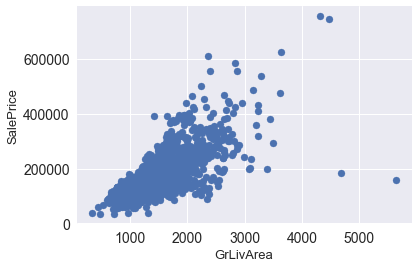

In [59]:
fig, ax = plt.subplots()
ax.scatter(x = all_data['GrLivArea'], y = all_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [60]:
tr=all_data[:1460]
ts=all_data[1460:]

ts.drop('SalePrice', axis=1,inplace=True)
tr.shape,ts.shape

((1460, 72), (1459, 71))

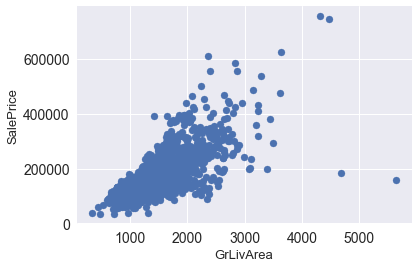

In [61]:
fig, ax = plt.subplots()
ax.scatter(x = tr['GrLivArea'], y = tr['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [62]:
#dropping outliers of GrLivArea as it is evidently out of the trend
tr = tr.drop(tr[(tr['GrLivArea']>4000) & (tr['SalePrice']<300000)].index)

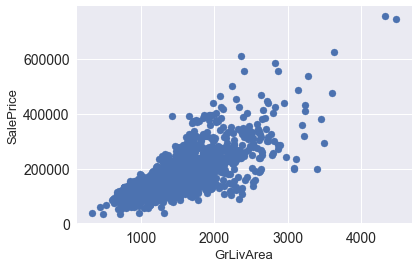

In [63]:
fig, ax = plt.subplots()
ax.scatter(x = tr['GrLivArea'], y = tr['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [64]:
tr.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr BldgType BsmtCond BsmtExposure  \
0       856       854          0             3     1Fam       TA           No   
1      1262         0          0             3     1Fam       TA           Gd   
2       920       866          0             3     1Fam       TA           Mn   
3       961       756          0             3     1Fam       Gd           No   
4      1145      1053          0             4     1Fam       TA           Av   

   BsmtFinSF1 BsmtFinType1 BsmtFinType2  BsmtFullBath BsmtQual  BsmtUnfSF  \
0   706.00000          GLQ          Unf       1.00000       Gd  150.00000   
1   978.00000          ALQ          Unf       0.00000       Gd  284.00000   
2   486.00000          GLQ          Unf       1.00000       Gd  434.00000   
3   216.00000          ALQ          Unf       1.00000       TA  540.00000   
4   655.00000          GLQ          Unf       1.00000       Gd  490.00000   

  CentralAir Condition1 Condition2 Electrical ExterCond ExterQual Exterior1st  \
0          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
1          Y      Feedr       Norm      SBrkr        TA        TA     MetalSd   
2          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   
3          Y       Norm       Norm      SBrkr        TA        TA     Wd Sdng   
4          Y       Norm       Norm      SBrkr        TA        Gd     VinylSd   

  Exterior2nd FireplaceQu  Fireplaces Foundation  FullBath Functional  \
0     VinylSd        None           0      PConc         2        Typ   
1     MetalSd          TA           1     CBlock         2        Typ   
2     VinylSd          TA           1      PConc         2        Typ   
3     Wd Shng          Gd           1     BrkTil         1        Typ   
4     VinylSd          TA           1      PConc         2        Typ   

   GarageArea  GarageCars GarageCond GarageFinish GarageQual GarageType  \
0   548.00000     2.00000         TA          RFn         TA     Attchd   
1   460.00000     2.00000         TA          RFn         TA     Attchd   
2   608.00000     2.00000         TA          RFn         TA     Attchd   
3   642.00000     3.00000         TA          Unf         TA     Detchd   
4   836.00000     3.00000         TA          RFn         TA     Attchd   

   GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle  \
0         2003       1710         1    GasA        Ex     2Story   
1         1976       1262         0    GasA        Ex     1Story   
2         2001       1786         1    GasA        Ex     2Story   
3         1998       1717         0    GasA        Gd     2Story   
4         2000       2198         1    GasA        Ex     2Story   

   KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  \
0             1          Gd         Lvl       Gtl     8450    Inside   
1             1          TA         Lvl       Gtl     9600       FR2   
2             1          Gd         Lvl       Gtl    11250    Inside   
3             1          Gd         Lvl       Gtl     9550    Corner   
4             1          Gd         Lvl       Gtl    14260       FR2   

   LotFrontage LotShape  MSSubClass MSZoning  MasVnrArea MasVnrType  MoSold  \
0     65.00000      Reg          60       RL   196.00000    BrkFace       2   
1     80.00000      Reg          20       RL     0.00000       None       5   
2     68.00000      IR1          60       RL   162.00000    BrkFace       9   
3     60.00000      IR1          70       RL     0.00000       None       2   
4     84.00000      IR1          60       RL   350.00000    BrkFace      12   

  Neighborhood  OpenPorchSF  OverallCond  OverallQual PavedDrive  PoolArea  \
0      CollgCr           61            5            7          Y         0   
1      Veenker            0            8            6          Y         0   
2      CollgCr           42            5            7          Y         0   
3      Crawfor           35            5       

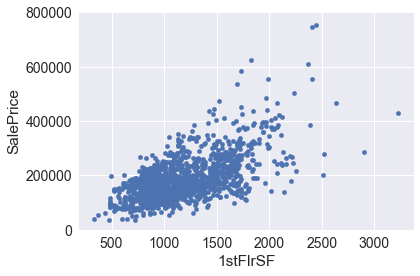

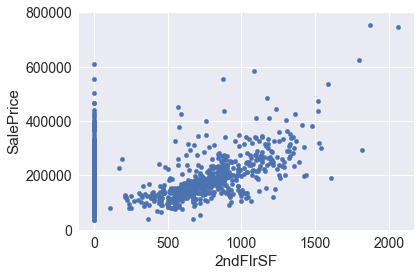

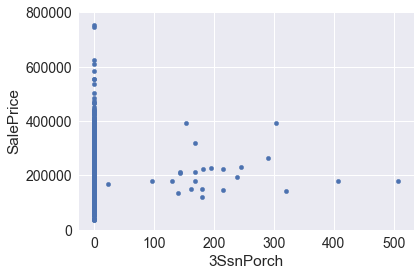

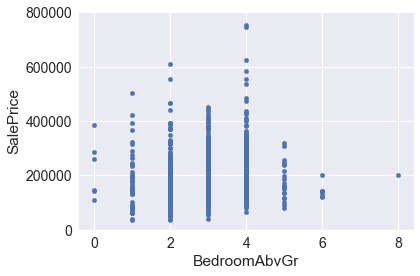

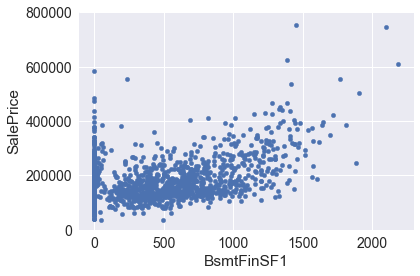

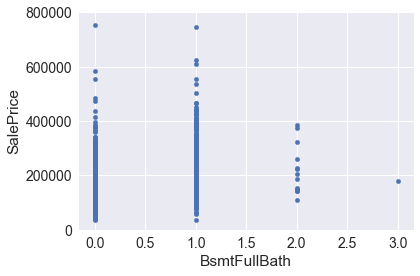

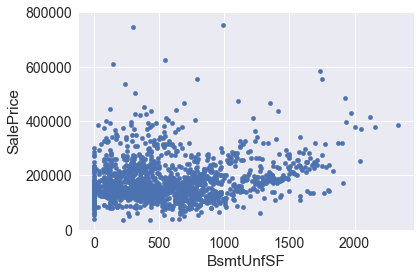

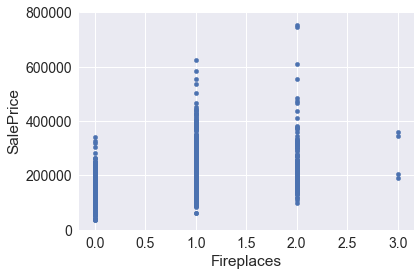

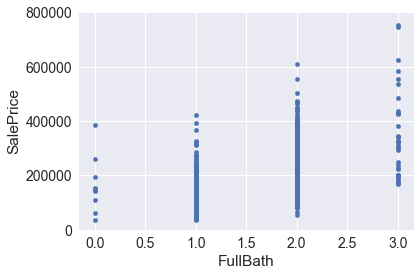

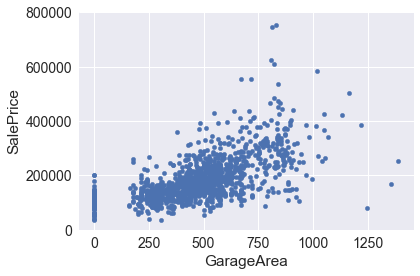

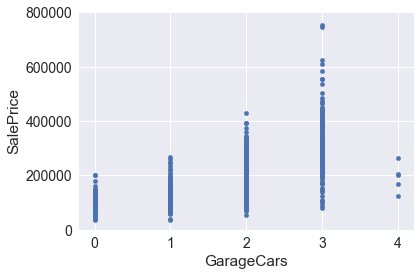

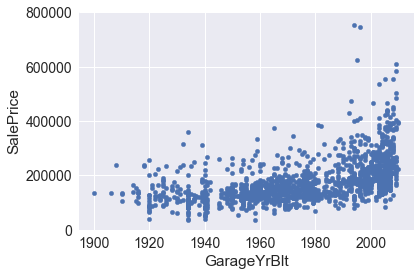

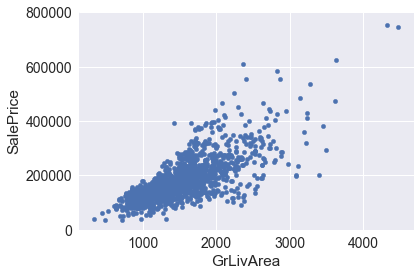

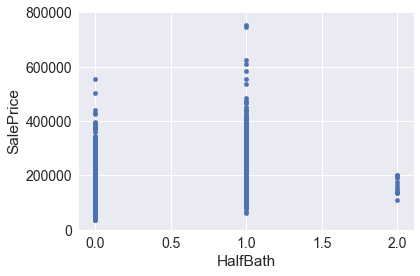

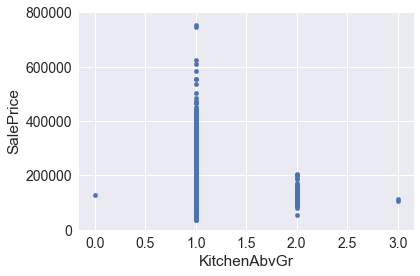

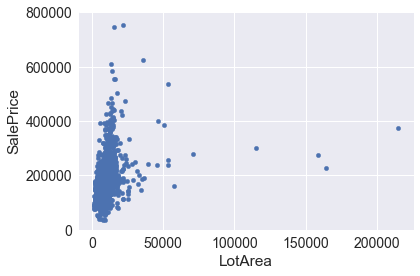

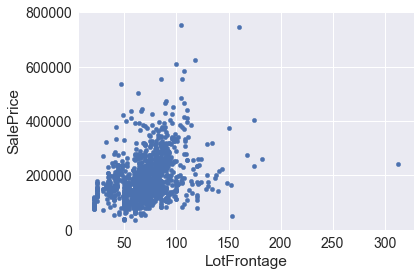

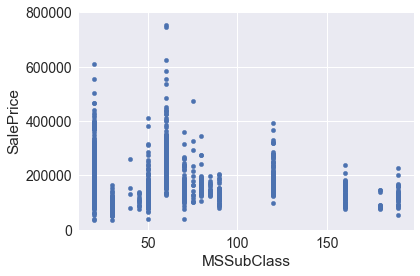

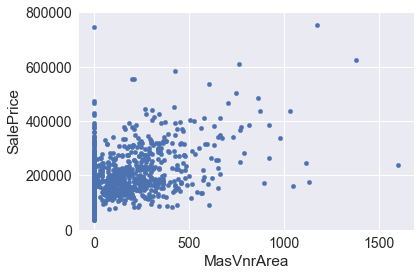

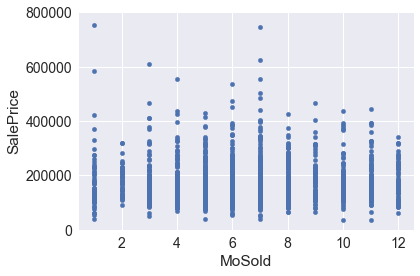

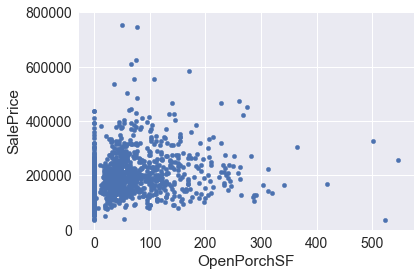

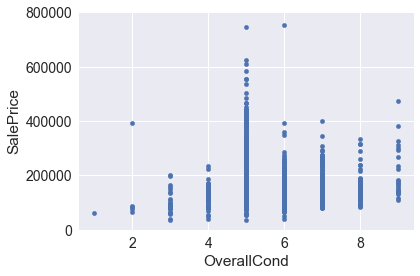

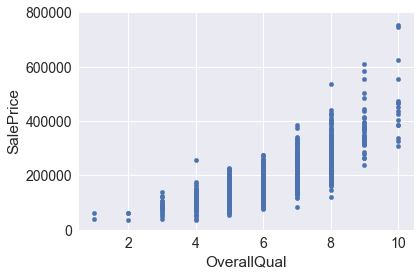

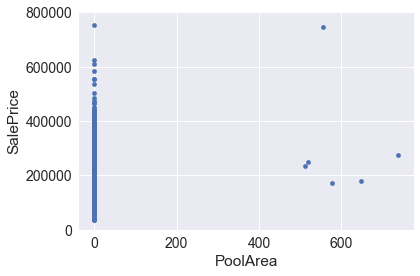

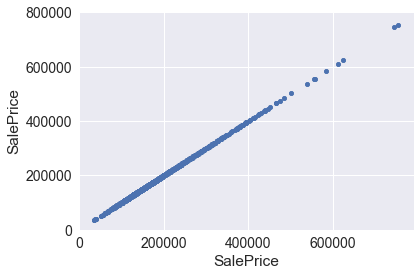

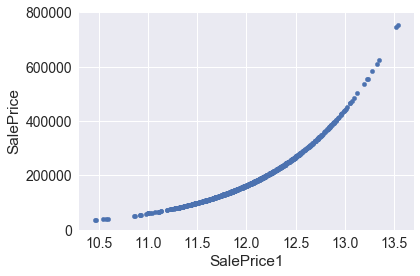

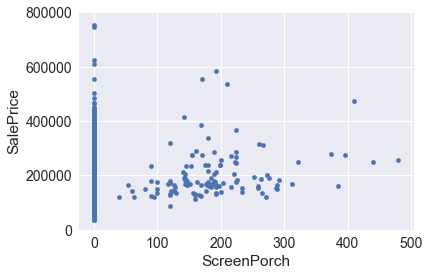

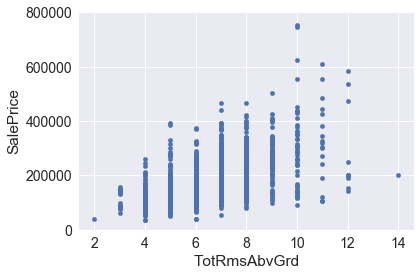

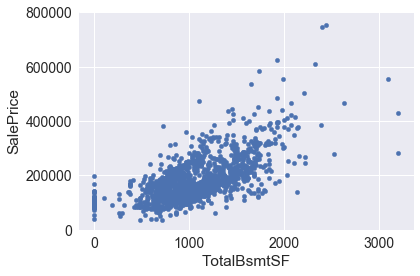

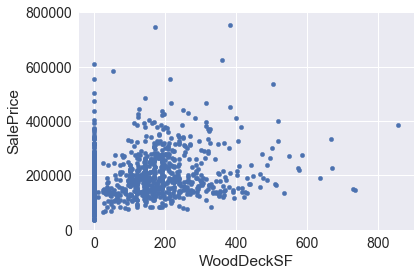

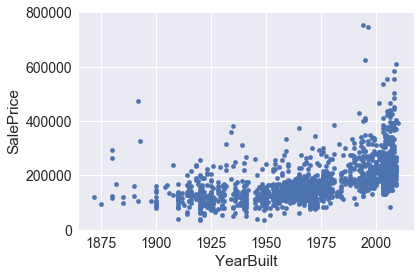

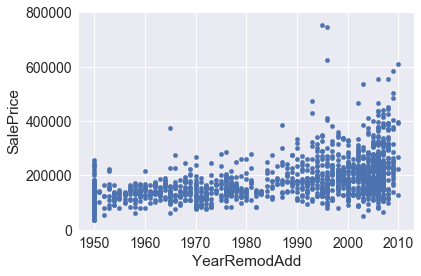

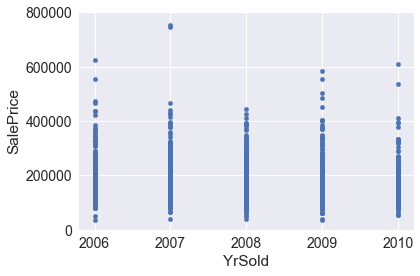

In [65]:
#visually checking for outliers
from pandas.api.types import is_numeric_dtype
for name in list(tr.columns):
    if is_numeric_dtype(tr[name]):
        data = pd.concat([tr['SalePrice'], tr[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))

In [66]:
#3removing outliers after visual inspection
tr = tr.drop(tr[tr['1stFlrSF'] > 2750].index)
tr = tr.drop(tr[tr['3SsnPorch'] > 500].index)
tr = tr.drop(tr[tr['BedroomAbvGr'] > 7].index)
tr = tr.drop(tr[tr['BsmtFullBath'] > 2.5].index)
tr = tr.drop(tr[tr['GarageCars'] > 3].index)
tr = tr.drop(tr[(tr['GarageArea'] > 1200) & (tr['SalePrice'] < 300000)].index)
tr = tr.drop(tr[tr['LotArea'] > 20000].index)
tr = tr.drop(tr[tr['LotFrontage'] > 300].index)
tr = tr.drop(tr[tr['MasVnrArea'] > 1500].index)
tr = tr.drop(tr[(tr['OpenPorchSF'] > 500) & (tr['SalePrice'] < 100000)].index)
tr = tr.drop(tr[(tr['LotFrontage'] > 150) & (tr['SalePrice'] < 100000)].index)

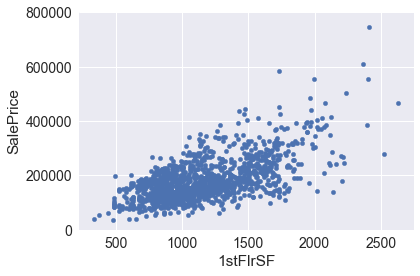

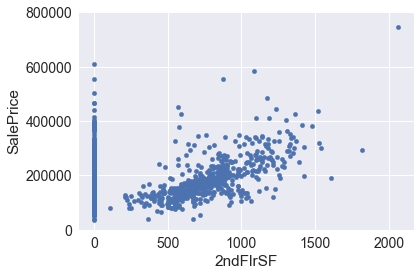

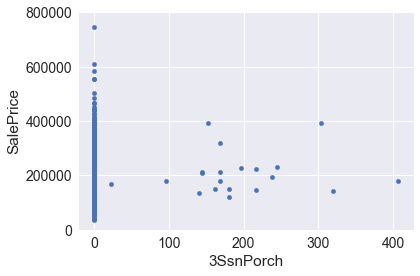

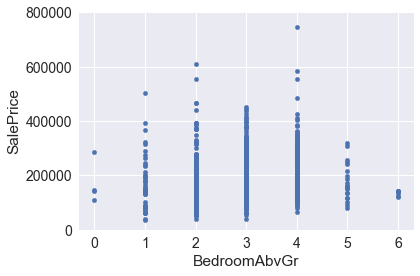

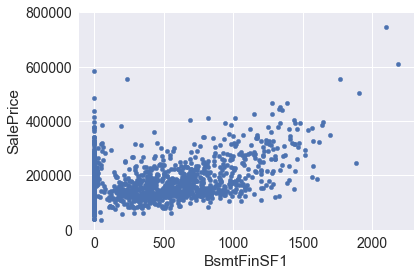

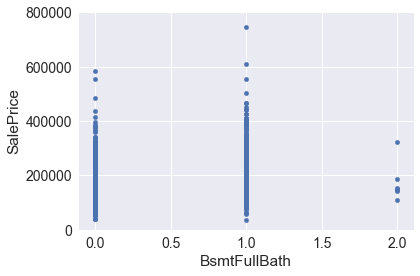

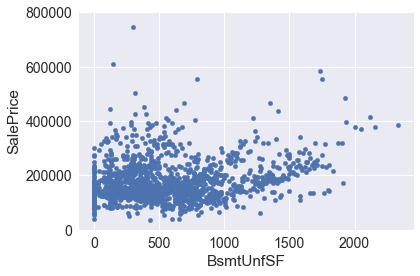

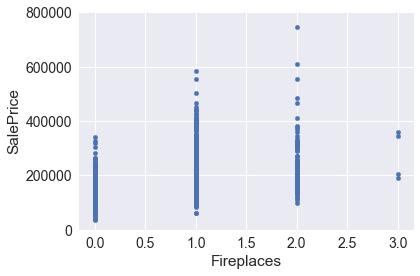

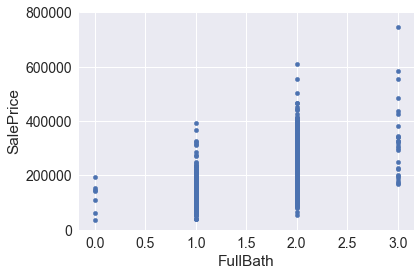

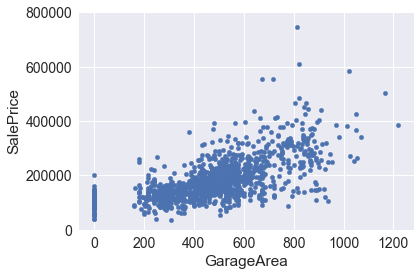

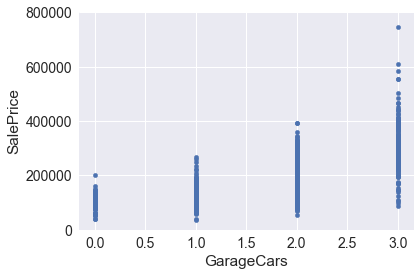

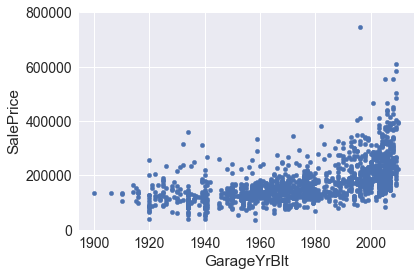

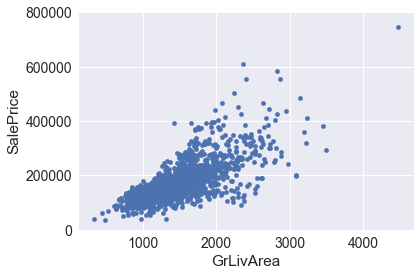

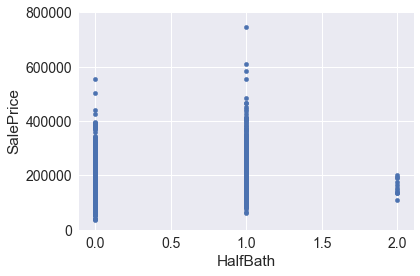

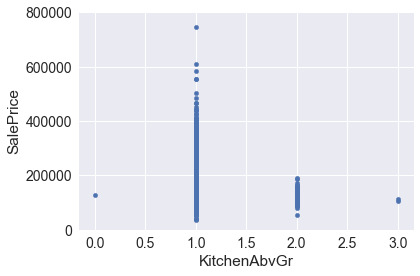

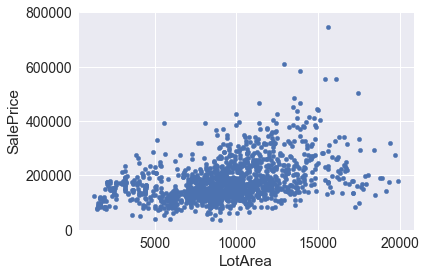

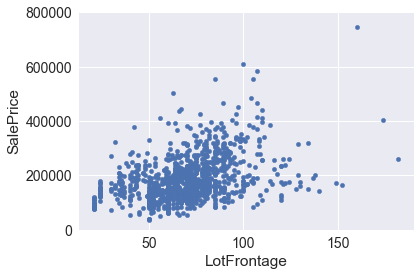

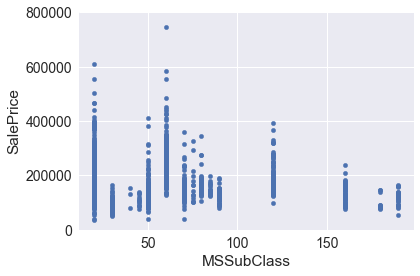

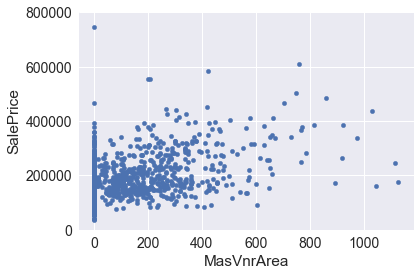

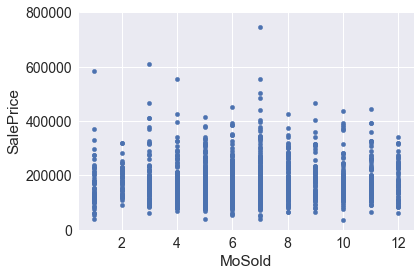

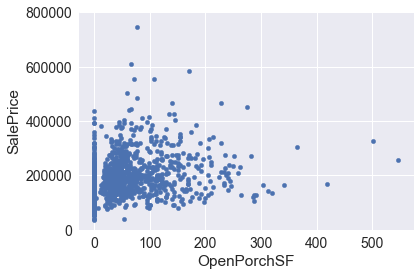

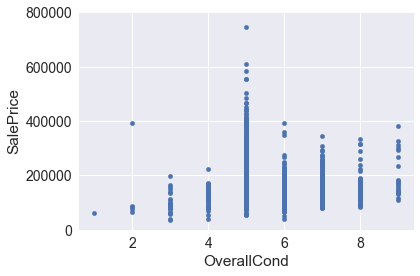

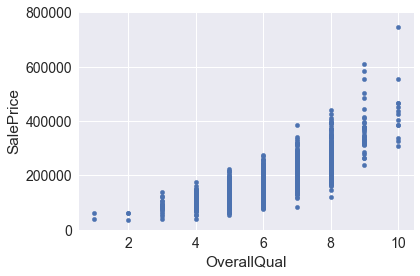

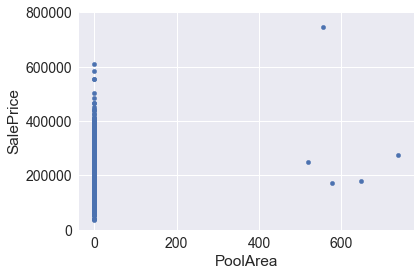

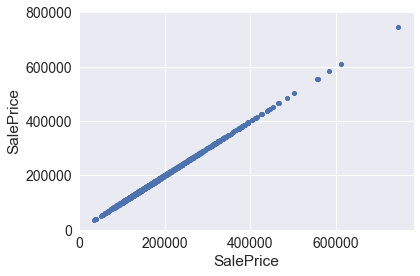

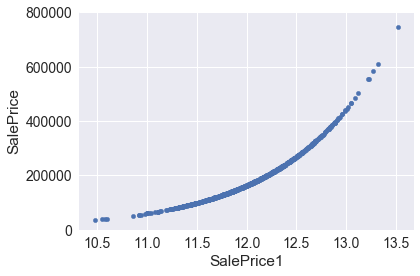

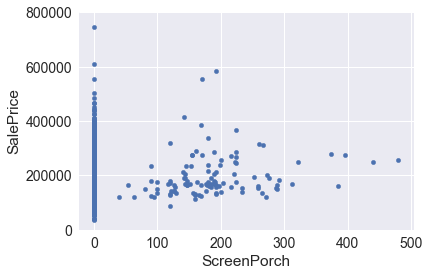

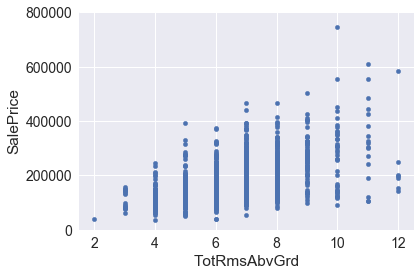

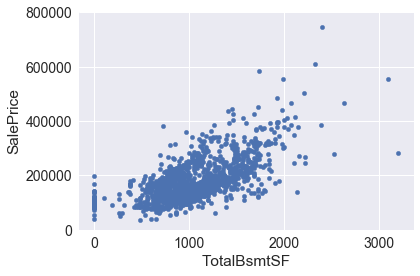

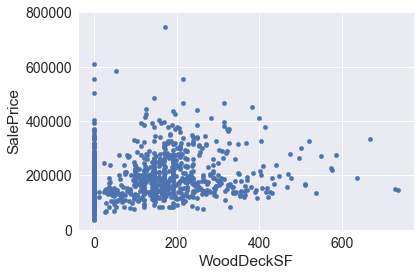

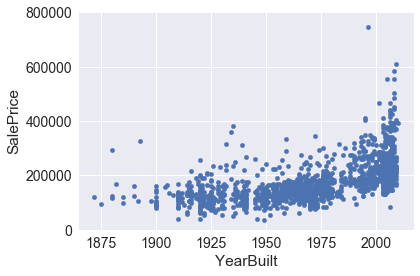

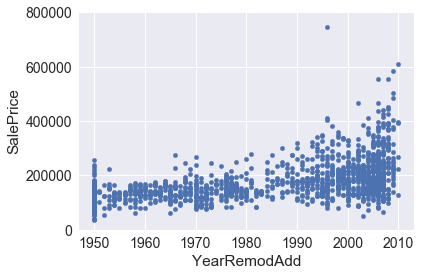

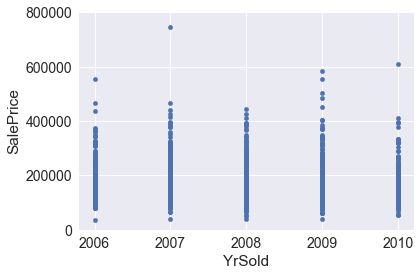

In [67]:
for name in list(tr.columns):
    if is_numeric_dtype(tr[name]):
        data = pd.concat([tr['SalePrice'], tr[name]], axis=1)
        data.plot.scatter(x=name, y='SalePrice', ylim=(0,800000))


In [68]:
#Exclude outlier in numeric dtype under 0.05 and over 0.95 quantile
from pandas.api.types import is_numeric_dtype
def remove_outlier(tr):
    low = .05
    high = .95
    quant_df = tr.quantile([low, high])
    for name in list(tr.columns):
        if is_numeric_dtype(tr[name]):
            tr = tr[(tr[name] > quant_df.loc[low, name]) & (tr[name] < quant_df.loc[high, name])]
    return tr

remove_outlier(tr).head()


Empty DataFrame
Columns: [1stFlrSF, 2ndFlrSF, 3SsnPorch, BedroomAbvGr, BldgType, BsmtCond, BsmtExposure, BsmtFinSF1, BsmtFinType1, BsmtFinType2, BsmtFullBath, BsmtQual, BsmtUnfSF, CentralAir, Condition1, Condition2, Electrical, ExterCond, ExterQual, Exterior1st, Exterior2nd, FireplaceQu, Fireplaces, Foundation, FullBath, Functional, GarageArea, GarageCars, GarageCond, GarageFinish, GarageQual, GarageType, GarageYrBlt, GrLivArea, HalfBath, Heating, HeatingQC, HouseStyle, KitchenAbvGr, KitchenQual, LandContour, LandSlope, LotArea, LotConfig, LotFrontage, LotShape, MSSubClass, MSZoning, MasVnrArea, MasVnrType, MoSold, Neighborhood, OpenPorchSF, OverallCond, OverallQual, PavedDrive, PoolArea, RoofMatl, RoofStyle, SaleCondition, SalePrice, SalePrice1, SaleType, ScreenPorch, Street, TotRmsAbvGrd, TotalBsmtSF, Utilities, WoodDeckSF, YearBuilt, YearRemodAdd, YrSold]
Index: []

In [69]:
tr.shape, ts.shape

((1393, 72), (1459, 71))

In [70]:
all_data_copy= all_data
all_data = pd.concat((tr, ts)).reset_index(drop=True)
all_data.shape

(2852, 72)

In [71]:
#total square footage
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [72]:
numeric_all = all_data.dtypes[(all_data.dtypes != "object") & (all_data.columns!='SalePrice')& (all_data.columns!='SalePrice1')].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_all].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



Skew
PoolArea     18.44003
3SsnPorch    11.18821
KitchenAbvGr  4.33774
ScreenPorch   3.96066
LotArea       2.61348
OpenPorchSF   2.49913
MasVnrArea    2.43700
WoodDeckSF    1.82568
MSSubClass    1.36132
1stFlrSF      1.23780
BsmtFinSF1    1.00272
GrLivArea     1.00192
TotalSF       0.96325
BsmtUnfSF     0.92044
2ndFlrSF      0.84411
Fireplaces    0.74021
TotRmsAbvGrd  0.71643
HalfBath      0.69553
TotalBsmtSF   0.65456
BsmtFullBath  0.57643

In [73]:
# box cox transform skewed vairables which have skew > 0.8
skewness = skewness[abs(skewness) > 0.8]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 32 skewed numerical features to Box Cox transform


In [74]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SalePrice', 'SalePrice1', 'SaleType', 'ScreenPorch',
       'Street', 'TotRmsAbv

In [75]:
# Converting numeric features to categorical features
strCols = ['YrSold','MoSold','MSSubClass','OverallCond']
for i in strCols:
    all_data[i]=all_data[i].astype(str)

In [76]:
all_data[all_data.dtypes[all_data.dtypes != "numeric"].index].columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir',
       'Condition1', 'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SalePrice', 'SalePrice1', 'SaleType', 'ScreenPorch',
       'Street', 'TotRmsAbv

In [77]:
all_data.ExterQual.value_counts()

TA    1758
Gd     960
Ex     101
Fa      33
Name: ExterQual, dtype: int64

In [78]:
#LabelEncoder to categorical features : these are caregorical features which are ordinal i.e. their categories are ranks
from sklearn.preprocessing import LabelEncoder
cols = ( 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','CentralAir',
        'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC',
        'KitchenQual','LandSlope','LotShape','MoSold','MSSubClass','OverallCond','PavedDrive','Street','YrSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))
    
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2852, 73)


In [79]:
all_data.ExterQual.value_counts()

3    1758
2     960
0     101
1      33
Name: ExterQual, dtype: int64

In [80]:
#get dummy variables
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2852, 209)


In [81]:
all_data['SalePrice']=all_data['SalePrice1']
all_data.drop('SalePrice1',axis=1, inplace=True)
print(all_data.shape)

(2852, 208)


In [82]:
# split back into test & train
X_train = all_data[all_data['SalePrice'].isna()==False]
y_train_T = X_train[all_data['SalePrice'].isna()==False]['SalePrice']
X_train.drop(columns = 'SalePrice', inplace=True)
X_test = all_data[all_data['SalePrice'].isna()!=False]
X_test.drop(columns = 'SalePrice', inplace=True)
X_train.shape, y_train_T.shape, X_test.shape

C:\Users\Mrinal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


((1393, 207), (1393,), (1459, 207))

C:\Users\Mrinal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


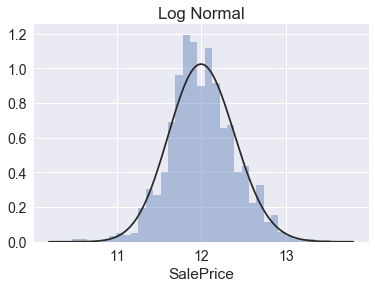

In [83]:
#confirm lognormal
plt.figure(3); plt.title('Log Normal')
sns.distplot(y_train_T, kde=False, fit=st.lognorm)

In [84]:
# Using Robust Scaler to transform X_train
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train_scaled = robust_scaler.fit(X_train).transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

In [85]:
#Feature importance using lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train_scaled,y_train_T)
y_pred_lasso = lasso.predict(X_test_scaled)
lassoCoeff = pd.DataFrame({"Feature Importance":lasso.coef_}, index=all_data.drop(columns = 'SalePrice').columns)
lassoCoeff.sort_values("Feature Importance",ascending=False)

Feature Importance
TotalSF                           0.13205
OverallQual                       0.09214
Neighborhood_Crawfor              0.09151
GrLivArea                         0.09102
YearBuilt                         0.08203
Neighborhood_StoneBr              0.06190
SaleCondition_Partial             0.05853
BsmtFinSF1                        0.05433
OverallCond                       0.04357
Neighborhood_NridgHt              0.04335
Exterior1st_BrkFace               0.04136
Condition1_Norm                   0.04014
Neighborhood_BrkSide              0.03354
CentralAir                        0.03281
LotArea                           0.03123
Neighborhood_NoRidge              0.03022
BldgType_1Fam                     0.02986
Fireplaces                        0.02923
GarageCars                        0.02923
Foundation_PConc                  0.02219
YearRemodAdd                      0.02163
BsmtFullBath                      0.02106
Functional                        0.02000
MasVnrType_Stone                  0.01669
1stFlrSF                          0.01651
MSZoning_FV                       0.01650
GarageYrBlt                       0.01552
Neighborhood_Somerst              0.01476
HalfBath                          0.01449
SaleCondition_Normal              0.01445
...                                   ...
3SsnPorch                         0.00000
BsmtFinType1                     -0.00000
KitchenAbvGr                     -0.00000
Exterior1st_ImStucc              -0.00000
TotRmsAbvGrd                      0.00000
MoSold                           -0.00005
Neighborhood_Gilbert             -0.00151
FireplaceQu                      -0.00334
Exterior1st_Plywood              -0.00359
SaleType_WD                      -0.00385
LotConfig_Inside                 -0.00470
GarageFinish                     -0.00516
BsmtExposure                     -0.00536
Exterior2nd_Plywood              -0.00577
YrSold                           -0.00588
Neighborhood_NWAmes              -0.00605
Neighborhood_OldTown             -0.00720
TotalBsmtSF                      -0.00743
Condition1_Artery                -0.00779
BedroomAbvGr                     -0.00812
BsmtUnfSF                        -0.01156
BldgType_Duplex                  -0.01573
Neighborhood_Edwards             -0.01734
BsmtQual                         -0.02253
HeatingQC                        -0.02307
ExterQual                        -0.02391
KitchenQual                      -0.02518
MSZoning_RM                      -0.02717
SaleCondition_Abnorml            -0.03760
MSZoning_C (all)                 -0.12091

[207 rows x 1 columns]

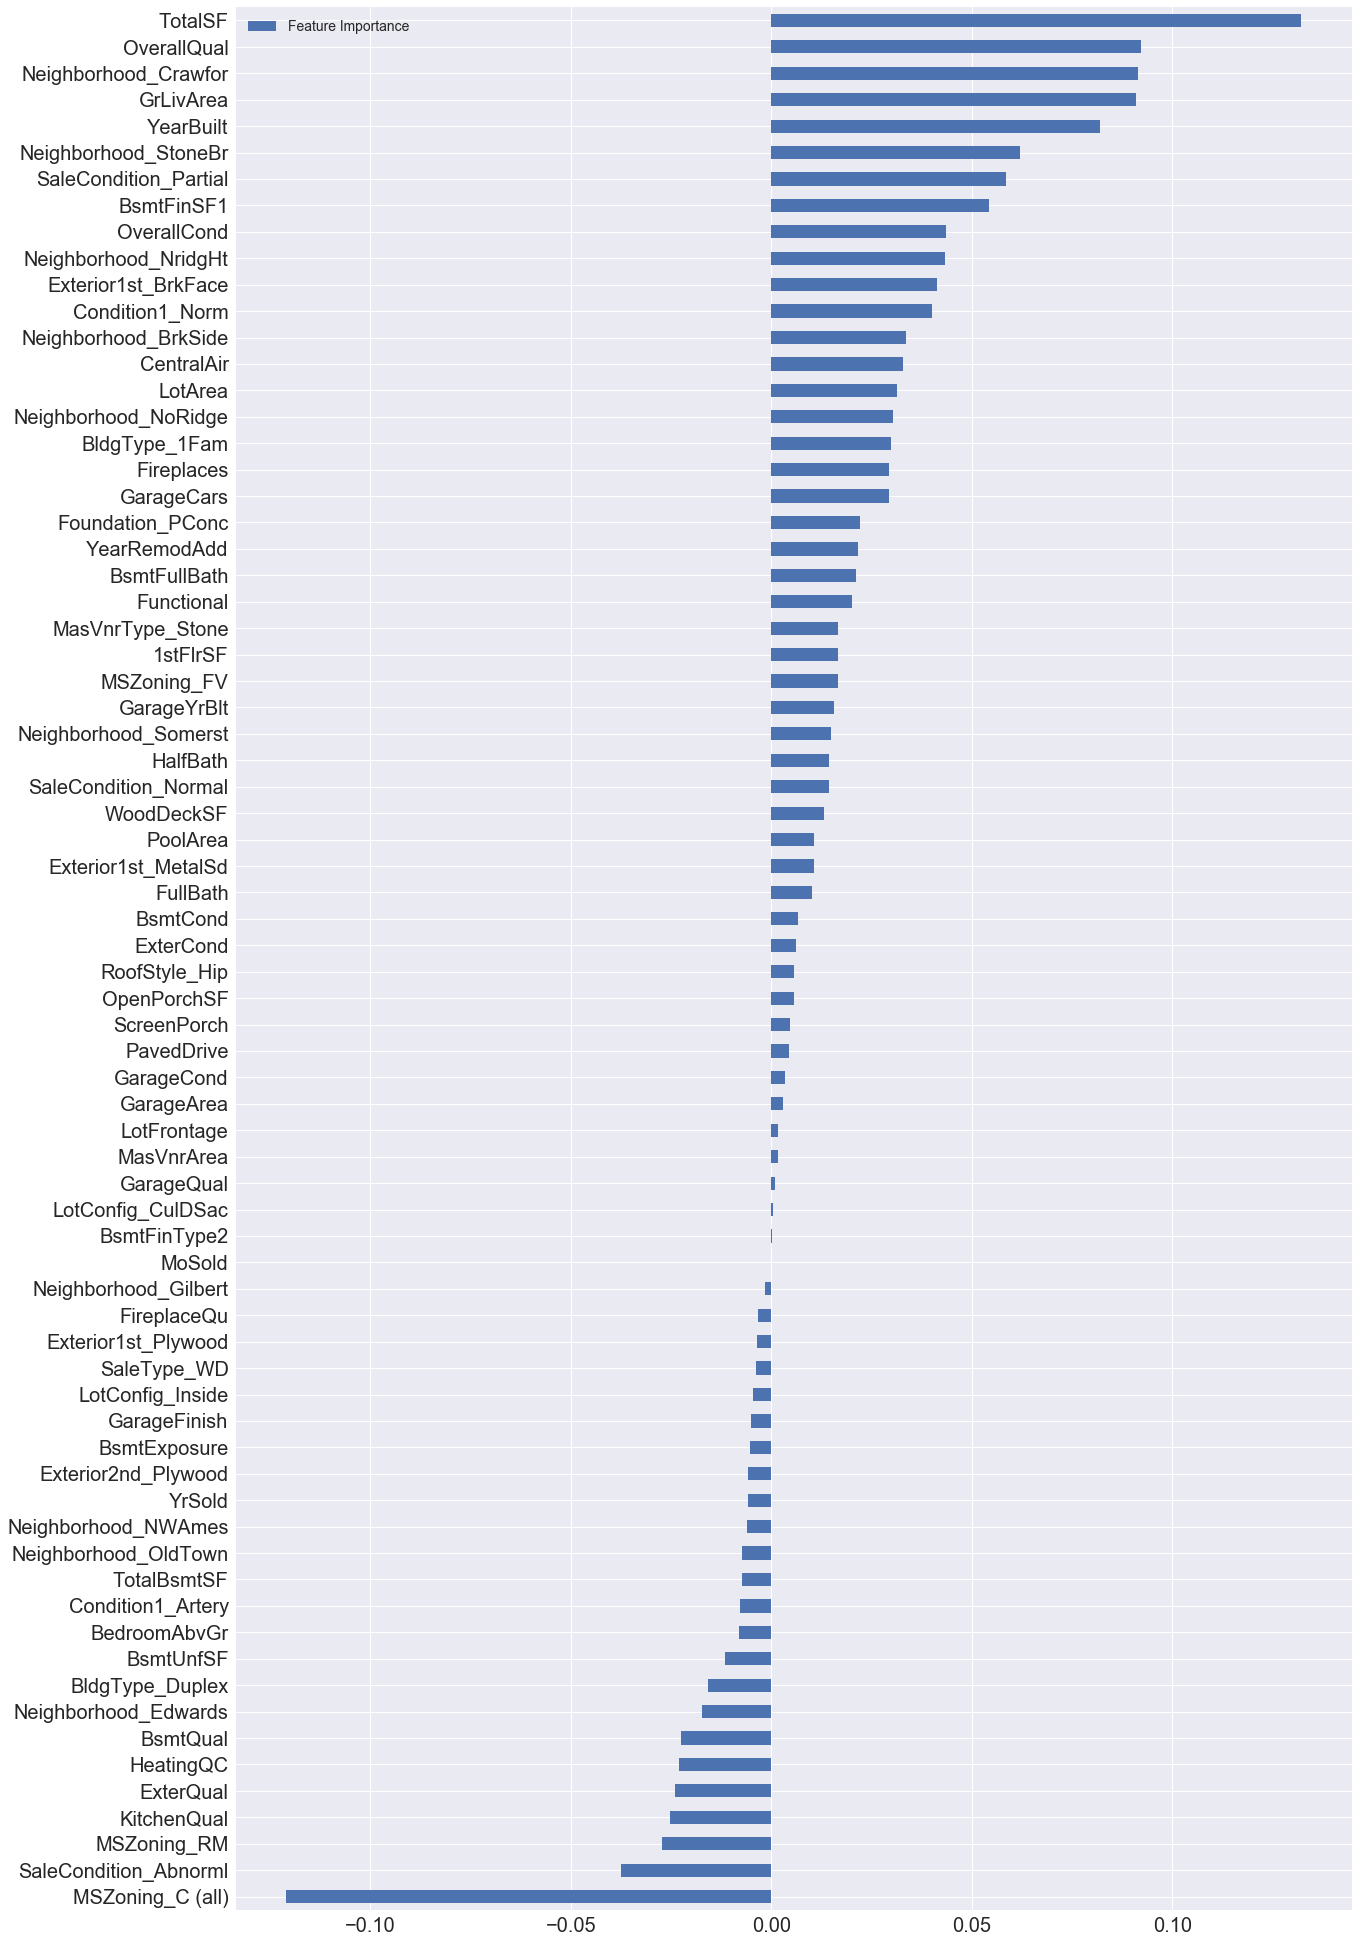

In [86]:
lassoCoeff[lassoCoeff["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(20,35),fontsize= 20)

In [87]:
# Principal Component Analysis of data such that 95% of the variance is retained
from sklearn.decomposition import PCA
data = np.concatenate([X_train_scaled,X_test_scaled])
pca = PCA(0.95)
data = pca.fit_transform(data)
varPCA = np.round(pca.explained_variance_ratio_*100, decimals = 1)
print(varPCA)

[16.7 11.1  6.9  5.7  5.2  4.6  3.6  3.1  2.7  2.4  2.2  2.   1.9  1.8
  1.6  1.5  1.4  1.2  1.1  1.   1.   0.9  0.9  0.8  0.8  0.8  0.7  0.7
  0.6  0.6  0.6  0.6  0.5  0.5  0.5  0.4  0.4  0.4  0.4  0.4  0.4  0.4
  0.4  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2
  0.2]


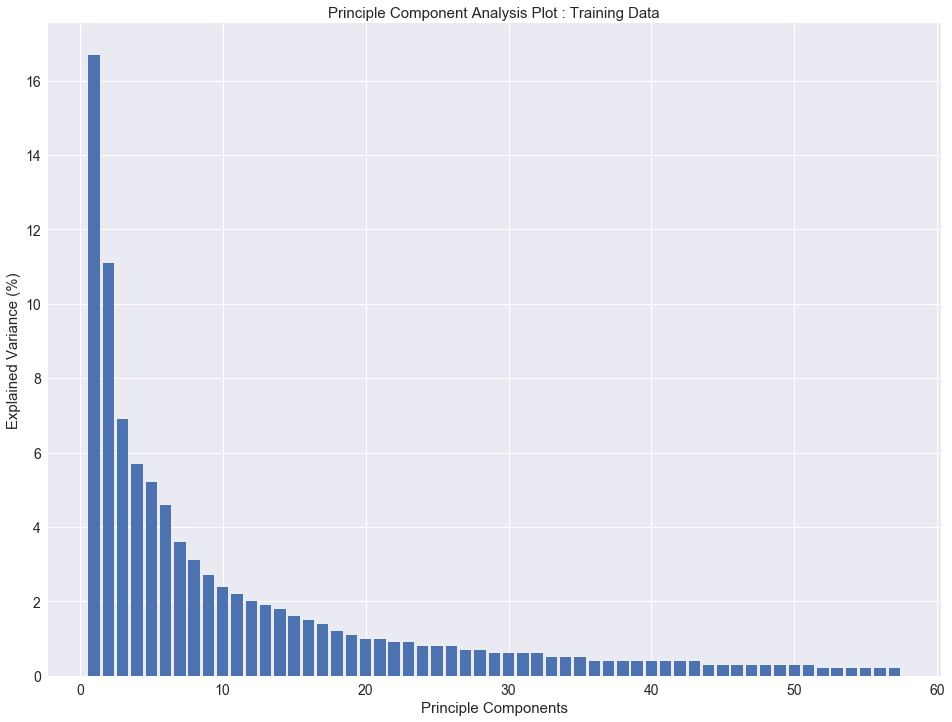

In [88]:
# Principal Component Analysis plot of the data
plt.figure(figsize=(16,12))
plt.bar(x=range(1,len(varPCA)+1), height = varPCA)
plt.ylabel("Explained Variance (%)", size = 15)
plt.xlabel("Principle Components", size = 15)
plt.title("Principle Component Analysis Plot : Training Data", size = 15)
plt.show()

In [89]:
X_train.shape, y_train_T.shape, X_test.shape, X_train.shape[0]

((1393, 207), (1393,), (1459, 207), 1393)

In [90]:
# Shape of final data we will be working on
X_train_scaled = data[:X_train.shape[0]]
X_test_scaled = data[X_train.shape[0]:]
X_train_scaled.shape, y_train_T.shape, X_test_scaled.shape

((1393, 57), (1393,), (1459, 57))

In [91]:
# importing the models
from sklearn.linear_model import LinearRegression, BayesianRidge, ElasticNet, Lasso, SGDRegressor, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR,SVR
import xgboost as xgb
# creating the models
models = [
             LinearRegression(),
             SVR(),
             SGDRegressor(),
             SGDRegressor(max_iter=1000, tol = 1e-3),
             RandomForestRegressor(),
             Lasso(),
             Lasso(alpha=0.01,max_iter=10000),
             Ridge(),
             BayesianRidge(),
             KernelRidge(),
             KernelRidge(alpha=0.6,kernel='polynomial',degree = 2,coef0=2.5),
             ElasticNet(),
             ElasticNet(alpha = 0.001,max_iter=10000),    
             ExtraTreesRegressor(),
             GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5),
             xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1),
             
             ]

names = ['Linear regression','Support vector regression','Stochastic gradient descent',
         'Stochastic gradient descent 2','Gradient boosting tree','Random forest',
         'Lasso regression','Lasso regression 2','Ridge regression','Bayesian ridge regression',
         'Kernel ridge regression','Kernel ridge regression 2','Elastic net regularization',
         'Elastic net regularization 2','Extra trees regression','Gradient Boosting','XGBoost']

In [92]:
# Define a root mean square error function
def rmse(model,X,y):
    rmse = np.sqrt(-cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=5))
    return rmse

In [93]:
from sklearn.model_selection import KFold,cross_val_score
warnings.filterwarnings('ignore')

# Perform 5-folds cross-calidation to evaluate the models 
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model,X_train_scaled,y_train_T)
    print("- {} : mean : {:.6f}, std : {:4f}".format(name, score.mean(),score.std()))

- Linear regression : mean : 0.117325, std : 0.006188
- Support vector regression : mean : 0.139196, std : 0.013835
- Stochastic gradient descent : mean : 0.198017, std : 0.047217
- Stochastic gradient descent 2 : mean : 0.142990, std : 0.023469
- Gradient boosting tree : mean : 0.157709, std : 0.005492
- Random forest : mean : 0.389635, std : 0.010546
- Lasso regression : mean : 0.130940, std : 0.004368
- Lasso regression 2 : mean : 0.117281, std : 0.006153
- Ridge regression : mean : 0.116950, std : 0.005833
- Bayesian ridge regression : mean : 12.639594, std : 0.438399
- Kernel ridge regression : mean : 0.115468, std : 0.004418
- Kernel ridge regression 2 : mean : 0.280707, std : 0.010358
- Elastic net regularization : mean : 0.116643, std : 0.005889
- Elastic net regularization 2 : mean : 0.156989, std : 0.007855
- Extra trees regression : mean : 0.137119, std : 0.010334
- Gradient Boosting : mean : 0.130152, std : 0.007523


In [94]:
import xgboost as xgb
xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmse(model,X_train_scaled,y_train_T)
print("- {} : mean : {:.6f}, std : {:4f}".format('XGBoost', score.mean(),score.std()))

- XGBoost : mean : 0.130152, std : 0.007523


In [95]:
#GridSearch Cross Validation of all models
from sklearn.model_selection import GridSearchCV

class gridSearch():
    def __init__(self,model):
        self.model = model
    def grid_get(self,param_grid):
        grid_search = GridSearchCV(self.model,param_grid,cv=5,scoring='neg_mean_squared_error')
        grid_search.fit(X_train_scaled,y_train_T)
        grid_search.cv_results_['mean_test_score'] = np.sqrt(-grid_search.cv_results_['mean_test_score'])
        print('\nBest parameters : {}, best score : {}'.format(grid_search.best_params_,np.sqrt(-grid_search.best_score_)))

In [96]:
gridSearch(SVR()).grid_get(
        {'C':[13,15,17,19,21],'kernel':["rbf"],"gamma":[0.0005,0.001,0.002,0.01],"epsilon":[0.01,0.02,0.03,0.1]})


Best parameters : {'C': 15, 'epsilon': 0.02, 'gamma': 0.001, 'kernel': 'rbf'}, best score : 0.11300169300448644


In [97]:
gridSearch(Lasso()).grid_get(
       {'alpha':[0.01,0.001,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009],'max_iter':[10000]})


Best parameters : {'alpha': 0.001, 'max_iter': 10000}, best score : 0.11651420398348859


In [98]:
gridSearch(Ridge()).grid_get(
        {'alpha':[10,20,25,30,35,40,45,50,55,57,60,65,70,75,80,100],'max_iter':[10000]}) 


Best parameters : {'alpha': 35, 'max_iter': 10000}, best score : 0.11686130072875005


In [99]:
gridSearch(KernelRidge()).grid_get(
        {'alpha':[3.5,4,4.5,5,5.5,6,6.5], 'kernel':["polynomial"], 'degree':[3],'coef0':[1,1.5,2,2.5,3,3.5]})


Best parameters : {'alpha': 6.5, 'coef0': 3, 'degree': 3, 'kernel': 'polynomial'}, best score : 0.11494575922048877


In [100]:
gridSearch(ElasticNet()).grid_get(
        {'alpha':[0.006,0.0065,0.007,0.0075,0.008],'l1_ratio':[0.070,0.075,0.080,0.085,0.09,0.095],'max_iter':[10000]})
   


Best parameters : {'alpha': 0.008, 'l1_ratio': 0.095, 'max_iter': 10000}, best score : 0.11656423504856417


In [101]:
linreg = LinearRegression()
svr = SVR(C = 13, epsilon= 0.02, gamma = 0.001, kernel = 'rbf')
lasso = Lasso(alpha= 0.0007, max_iter= 10000)
ridge = Ridge(alpha=30, max_iter= 10000)
kerridge = KernelRidge(alpha=6.5 ,kernel='polynomial', degree=3 , coef0=3)
enet = ElasticNet(alpha=0.008,l1_ratio=0.07,max_iter=10000)
bayridge = BayesianRidge()
gb = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb=xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [102]:
#Average Models
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # creating clones of the original models
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # fitting our data to the models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #making predictions on our fitted models and averaging them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [103]:
models=[linreg,svr,lasso,ridge,kerridge,enet,bayridge,gb,xgb]
names=['linreg','svr','lasso','ridge','kerridge','enet','bayridge','gb','xgb']
models1=[svr,lasso,ridge,kerridge,enet,bayridge]
names1=['svr','lasso','ridge','kerridge','enet','bayridge']
d = dict(zip(names,models))
d1= dict(zip(names1,models1))

In [118]:
#check for combinations
import itertools
i=0
for L in range(3, 4):
    for subset in itertools.combinations(d1, L):
        print (subset)

('svr', 'lasso', 'ridge')
('svr', 'lasso', 'kerridge')
('svr', 'lasso', 'enet')
('svr', 'lasso', 'bayridge')
('svr', 'ridge', 'kerridge')
('svr', 'ridge', 'enet')
('svr', 'ridge', 'bayridge')
('svr', 'kerridge', 'enet')
('svr', 'kerridge', 'bayridge')
('svr', 'enet', 'bayridge')
('lasso', 'ridge', 'kerridge')
('lasso', 'ridge', 'enet')
('lasso', 'ridge', 'bayridge')
('lasso', 'kerridge', 'enet')
('lasso', 'kerridge', 'bayridge')
('lasso', 'enet', 'bayridge')
('ridge', 'kerridge', 'enet')
('ridge', 'kerridge', 'bayridge')
('ridge', 'enet', 'bayridge')
('kerridge', 'enet', 'bayridge')


In [119]:
averaged_model = AveragingModels(models = (lasso,enet, ridge))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11654004772412363, 0.005643322475262227)

In [120]:
averaged_model = AveragingModels(models = (ridge,enet, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11403520014717852, 0.005633333194481145)

In [121]:
averaged_model = AveragingModels(models = (kerridge,enet, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11265816277787359, 0.005131815194717448)

In [122]:
averaged_model = AveragingModels(models = (bayridge,enet, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11407376104085384, 0.005767825807104011)

In [123]:
averaged_model = AveragingModels(models = (lasso,enet, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11394259556237796, 0.0057479120941505025)

In [124]:
averaged_model = AveragingModels(models = (ridge,kerridge, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11274977493194709, 0.005055148312959536)

In [125]:
averaged_model = AveragingModels(models = (kerridge, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.1127669864682674, 0.0048300894728194035)

In [126]:
averaged_model = AveragingModels(models = (enet, svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.1131772293535784, 0.005692333004453077)

In [127]:
averaged_model = AveragingModels(models = (kerridge,enet, lasso,svr))
score = rmse(averaged_model,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11310816783643332, 0.005309307193351355)

In [128]:
models = [linreg,svr,lasso,ridge,kerridge,bayridge,enet,gb,xgb]
             
             

names = ['Linear regression','Support vector regression','Lasso regression','Ridge regression','Kernel ridge regression','Bayesian ridge regression',
         'Elastic net regularization','Gradient Boosting','XGBoost']

In [129]:
warnings.filterwarnings('ignore')

# Perform 5-folds cross-calidation to evaluate the models 
for model, name in zip(models, names):
    # Root mean square error
    score = rmse(model,X_train_scaled,y_train_T)
    print("- {} : mean : {:.6f}, std : {:4f}".format(name, score.mean(),score.std()))

- Linear regression : mean : 0.117325, std : 0.006188
- Support vector regression : mean : 0.112876, std : 0.005570
- Lasso regression : mean : 0.116495, std : 0.005803
- Ridge regression : mean : 0.116736, std : 0.005437
- Kernel ridge regression : mean : 0.114853, std : 0.004533
- Bayesian ridge regression : mean : 0.116950, std : 0.005833
- Elastic net regularization : mean : 0.116505, std : 0.005681
- Gradient Boosting : mean : 0.137119, std : 0.010334
- XGBoost : mean : 0.130152, std : 0.007523


In [130]:
averaged_model1 = AveragingModels(models = (kerridge, svr))
score = rmse(averaged_model1,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.1127669864682674, 0.0048300894728194035)

In [131]:
averaged_model2 = AveragingModels(models = (kerridge, svr,enet))
score = rmse(averaged_model2,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.11265816277787362, 0.005131815194717457)

In [132]:
averaged_model3 = AveragingModels(models = ( svr,enet))
score = rmse(averaged_model3,X_train_scaled, y_train_T)
score.mean(), score.std()

(0.1131772293535784, 0.005692333004453077)

In [133]:
#fit
k_svr = averaged_model1.fit(X_train_scaled,y_train_T)
kerridge_svr_enet = averaged_model2.fit(X_train_scaled,y_train_T)
svr_enet = averaged_model3.fit(X_train_scaled,y_train_T)
svr1 = svr.fit(X_train_scaled,y_train_T)
kerridge1 = kerridge.fit(X_train_scaled,y_train_T)
enet1 = enet.fit(X_train_scaled,y_train_T)


In [134]:
#predict
avg_pred1_k_svr = np.expm1(k_svr.predict(X_test_scaled))
avg_pred_kerridge_svr_enet = np.expm1(kerridge_svr_enet.predict(X_test_scaled))
avg_pred_svr_enet = np.expm1(svr_enet.predict(X_test_scaled))
avg_pred_svr = np.expm1(svr.predict(X_test_scaled))
avg_pred_kerridge = np.expm1(kerridge.predict(X_test_scaled))
avg_pred_enet = np.expm1(enet.predict(X_test_scaled))


In [135]:
X_test_scaled.shape, test_ID.count()

((1459, 57), 1459)

In [136]:
p=[avg_pred1_k_svr, avg_pred_kerridge_svr_enet, avg_pred_svr_enet, avg_pred_svr, avg_pred_kerridge,avg_pred_enet]
n=['KRR_SVR','KRR_SVR_ENET','SVR_ENET','SVR','KRR','ENET']

for model, name in zip(p,n):
    sub = pd.DataFrame()
    sub['Id'] = test_ID
    sub['SalePrice'] = model
    sub.to_csv(('FINALsub_(%s).csv' % name),index=False)

In [137]:
print(" Best model train MSE = 0.1128")
print(" Best model test MSE = 0.12027")

 Best model train MSE = 0.1128
 Best model test MSE = 0.12027
